In [81]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.stats import multivariate_normal
import math
import time
import multiprocessing as mp
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd
from matplotlib import rc


# MUTANTS

- Recreates the spatial patterning of wiltype and mutants presented by Cohen et al (2014) after including protein dynamics in the model
- Set alpha=0 and initial condition =0 for mutants

In [3]:

def simulate_data(parameter_list):
    run= solve_ivp(ODEs, y0=X0, t_span = t_range, args =tuple(parameter_list), t_eval = timepts, dense_output=True) 
#     run_array = np.array(run.y[0:4]).T    
    run_array = np.array(run.y).T

    return run_array

G: [3.79366789e+00 1.94773404e+00 1.00000000e+00 5.13417119e-01
 2.63597138e-01 1.35335283e-01 6.94834512e-02 3.56739933e-02
 1.83156389e-02 9.40356255e-03 4.82794999e-03 2.47875218e-03
 1.27263380e-03]


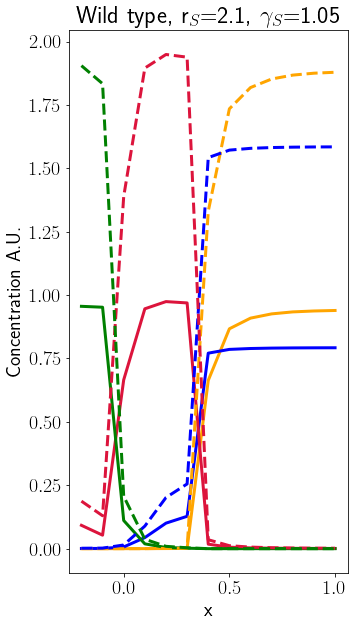

In [123]:
def ODEs(t, X, r_s, gamma_s, K_NI, K_OI, K_NP, K_OP, K_IO, K_NO, K_GO, K_IN, K_PN, K_ON, K_GN, K_LN, K_LP, K_LI, K_LO):

    ## Ruben's Phi's
    phi_I = (((10**K_LI)*L)/(((10**K_LI)*L)+((1+(10**K_OI)*X[6])**2)*(1+(10**K_NI)*X[7])**2))
    phi_P = (((10**K_LP)*L)/(((10**K_LP)*L)+((1+(10**K_OP)*X[6])**2)*(1+(10**K_NP)*X[7])**2))
    phi_O = (((10**K_LO)*L*(1+c*(10**K_GO)*G))/(((10**K_LO)*L*(1+c*(10**K_GO)*G))+(1+(10**K_GO))*((1+(10**K_NO)*X[7])**2)*((1+(10**K_IO)*X[4])**2)))
    phi_N = (((10**K_LN)*L*(1+c*(10**K_GN)*G))/(((10**K_LN)*L*(1+c*(10**K_GN)*G))+(1+(10**K_GN))*((1+(10**K_ON)*X[6])**2)*((1+(10**K_IN)*X[4])**2)*((1+(10**K_PN)*X[5])**2)))
    
    dmI_dt = alpha_s*phi_I - alpha_s*X[0]
    dmP_dt = alpha_s*phi_P - alpha_s*X[1]
    dmO_dt = alpha_s*phi_O - alpha_s*X[2]
    dmN_dt = alpha_s*phi_N - alpha_s*X[3]
   
    dI_dt = (10**r_s)*X[0] - (10**gamma_s)*X[4]
    dP_dt = (10**r_s)*X[1] - (10**gamma_s)*X[5]
    dO_dt = (10**r_s)*X[2] - (10**gamma_s)*X[6]
    dN_dt = (10**r_s)*X[3] - (10**gamma_s)*X[7]
    
    return np.array([dmI_dt, dmP_dt, dmO_dt, dmN_dt, dI_dt, dP_dt, dO_dt, dN_dt])


## I P O N
# X0 = [0.9,0.95,0.11,0.002]
X0 = [1,1,0,0,1,1,0,0]
timepts=[0.5,1, 1.5, 2, 2.5, 3, 3.5, 4,5,6,7,8,9,10,11,12,13,14,16,18,20]
t_range=[0.5,20]
alpha_s=100
x = np.array([-0.2,-0.1,0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
Gs = np.exp(-x/0.15)
L=0.8
c=10
print('G:',Gs)

peaks = [0.14664250751765692, 0.07751490598582489, 1.0750962183112382, 0.6414799643867624, 0.5371194132338379, 1.8879630372610876, -0.7714850961134183, 1.8902545068786845, 0.8761092355888365, 0.5745155547245453, 0.6308442953609621, -0.8364602541110746, 0.10871700343449842, -0.6171452052053545, -0.9340166901946141, 0.07587541639252882, 1.030788024298784]

unloggedpeaks = np.array([2.1,2.1,76.2,58.8,26.7,1.9,28.4,60.6,18.0,47.1,4.8,27.1, 37.3,27.4, 4.80, 23.4, 47.8])
peaks = np.log10(unloggedpeaks)
# print(peaks)
rc('text', usetex=True)

ss=[]
for n in Gs:
    G=n
    go = simulate_data(peaks)
    ss.append((go[-1]))


ss=np.array(ss)

### plot ###
plt.rcParams.update({'font.size': 20})


## plot trajectories###
# plt.rcParams["figure.figsize"] = (5,5)
# _, ax = plt.subplots()
# ax.plot(x, ss[:, 0], "-", color="orange", label="[mI]", linewidth=3.0)
# ax.plot(x, ss[:, 1], "-", color="blue", label = "[mP]",linewidth=3.0)
# ax.plot(x, ss[:, 2], "-", color="crimson", label = "[mO]",linewidth=3.0)
# ax.plot(x, ss[:, 3], "-", color="green", label = "[mN]",linewidth=3.0)
# ax.plot(x, ss[:, 4], "--", color="orange", label="[I]", linewidth=3.0)
# ax.plot(x, ss[:, 5], "--", color="blue", label = "[P]",linewidth=3.0)
# ax.plot(x, ss[:, 6], "--", color="crimson", label = "[O]",linewidth=3.0)
# ax.plot(x, ss[:, 7], "--", color="green", label = "[N]",linewidth=3.0)


# ax.set_xlabel("x")
# ax.set_ylabel("Concentration A.U.")
# ax.set_title('Wild type, ' + 'r$\r_S$'+'=2.1'+ ', ' + r'$\gamma_S$'+'=2.1')
# plt.savefig('mutants/Rayon_mutants/WT')
# plt.show()

### hooman - halve protein production and degradation rate

peaks = [0.14664250751765692, 0.07751490598582489, 1.0750962183112382, 0.6414799643867624, 0.5371194132338379, 1.8879630372610876, -0.7714850961134183, 1.8902545068786845, 0.8761092355888365, 0.5745155547245453, 0.6308442953609621, -0.8364602541110746, 0.10871700343449842, -0.6171452052053545, -0.9340166901946141, 0.07587541639252882, 1.030788024298784]

unloggedpeaks = np.array([2.1,1.05,76.2,58.8,26.7,1.9,28.4,60.6,18.0,47.1,4.8,27.1, 37.3,27.4, 4.80, 23.4, 47.8])
peaks = np.log10(unloggedpeaks)

x = np.array([-0.2,-0.1,0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
Gs = np.exp(-x/0.15)
ss=[]
for n in Gs:
    G=n
    go = simulate_data(peaks)
    ss.append((go[-1]))

ss=np.array(ss)

## plot trajectories###
plt.rcParams["figure.figsize"] = (5,10)
_, ax = plt.subplots()
ax.plot(x, ss[:, 0], "-", color="orange", label="[mI]", linewidth=3.0)
ax.plot(x, ss[:, 1], "-", color="blue", label = "[mP]", linewidth=3.0)
ax.plot(x, ss[:, 2], "-", color="crimson", label = "[mO]", linewidth=3.0)
ax.plot(x, ss[:, 3], "-", color="green", label = "[mN]", linewidth=3.0)
ax.plot(x, ss[:, 4], "--", color="orange", label="[I]", linewidth=3.0)
ax.plot(x, ss[:, 5], "--", color="blue", label = "[P]", linewidth=3.0)
ax.plot(x, ss[:, 6], "--", color="crimson", label = "[O]", linewidth=3.0)
ax.plot(x, ss[:, 7], "--", color="green", label = "[N]", linewidth=3.0)



ax.set_xlabel("x")
ax.set_ylabel("Concentration A.U.")
ax.set_title('Wild type, ' + 'r$\r_S$'+'=2.1'+ ', ' + r'$\gamma_S$'+'=1.05')
# ax.legend(loc ='center right', bbox_to_anchor=(2.5,2.5));

# plt.savefig('mutants/Rayon_mutants/WThooman')
plt.show()


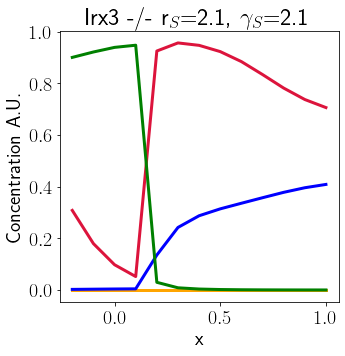

In [33]:
# I  mutant
X0 = [0,1,0,0,0,1,0,0]
x = np.array([-0.2,-0.1,0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
Gs = np.exp(-x/0.15)
def ODEs(t, X, r_s, gamma_s, K_NI, K_OI, K_NP, K_OP, K_IO, K_NO, K_GO, K_IN, K_PN, K_ON, K_GN, K_LN, K_LP, K_LI, K_LO):
    
    # Ruben's Phi's
    phi_I = (((10**K_LI)*L)/(((10**K_LI)*L)+((1+(10**K_OI)*X[6])**2)*(1+(10**K_NI)*X[7])**2))
    phi_P = (((10**K_LP)*L)/(((10**K_LP)*L)+((1+(10**K_OP)*X[6])**2)*(1+(10**K_NP)*X[7])**2))
    phi_O = (((10**K_LO)*L*(1+c*(10**K_GO)*G))/(((10**K_LO)*L*(1+c*(10**K_GO)*G))+(1+(10**K_GO))*((1+(10**K_NO)*X[7])**2)*((1+(10**K_IO)*X[4])**2)))
    phi_N = (((10**K_LN)*L*(1+c*(10**K_GN)*G))/(((10**K_LN)*L*(1+c*(10**K_GN)*G))+(1+(10**K_GN))*((1+(10**K_ON)*X[6])**2)*((1+(10**K_IN)*X[4])**2)*((1+(10**K_PN)*X[5])**2)))
    
    dmI_dt = 0*phi_I - alpha_s*X[0]
    dmP_dt = alpha_s*phi_P - alpha_s*X[1]
    dmO_dt = alpha_s*phi_O - alpha_s*X[2]
    dmN_dt = alpha_s*phi_N - alpha_s*X[3]
   
    dI_dt = (10**r_s)*X[0] - (10**gamma_s)*X[4]
    dP_dt = (10**r_s)*X[1] - (10**gamma_s)*X[5]
    dO_dt = (10**r_s)*X[2] - (10**gamma_s)*X[6]
    dN_dt = (10**r_s)*X[3] - (10**gamma_s)*X[7]
    
    return np.array([dmI_dt, dmP_dt, dmO_dt, dmN_dt, dI_dt, dP_dt, dO_dt, dN_dt])

unloggedpeaks = np.array([2.1,2.1,76.2,58.8,26.7,1.9,28.4,60.6,18.0,47.1,4.8,27.1, 37.3,27.4, 4.80, 23.4, 47.8])
peaks = np.log10(unloggedpeaks)

ss=[]
for n in Gs:
    G=n
    go = simulate_data(peaks)
    ss.append((go[-1]))

ss=np.array(ss)

### plot ###
_, ax = plt.subplots()
ax.plot(x, ss[:, 0], "-", color="orange", label="[I]", linewidth=3.0)
ax.plot(x, ss[:, 1], "-", color="blue", label = "[P]",linewidth=3.0)
ax.plot(x, ss[:, 2], "-", color="crimson", label = "[O]",linewidth=3.0)
ax.plot(x, ss[:, 3], "-", color="green", label = "[N]",linewidth=3.0)
ax.set_xlabel("x")
ax.set_ylabel("Concentration A.U.")
ax.set_title("Irx3 -/- "+ 'r$\r_S$'+'=2.1'+ ', ' + r'$\gamma_S$'+'=2.1')
# ax.legend(loc ='upper right');
# plt.savefig('mutants/Rayon_mutants/I--.png')
plt.show()

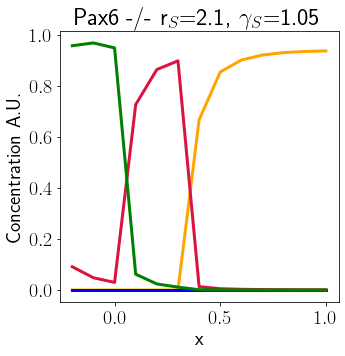

In [38]:
# P  mutant
X0 = [1,0,0,0,1,0,0,0]
def ODEs(t, X, r_s, gamma_s, K_NI, K_OI, K_NP, K_OP, K_IO, K_NO, K_GO, K_IN, K_PN, K_ON, K_GN, K_LN, K_LP, K_LI, K_LO):
    
    # Ruben's Phi's
    phi_I = (((10**K_LI)*L)/(((10**K_LI)*L)+((1+(10**K_OI)*X[6])**2)*(1+(10**K_NI)*X[7])**2))
    phi_P = (((10**K_LP)*L)/(((10**K_LP)*L)+((1+(10**K_OP)*X[6])**2)*(1+(10**K_NP)*X[7])**2))
    phi_O = (((10**K_LO)*L*(1+c*(10**K_GO)*G))/(((10**K_LO)*L*(1+c*(10**K_GO)*G))+(1+(10**K_GO))*((1+(10**K_NO)*X[7])**2)*((1+(10**K_IO)*X[4])**2)))
    phi_N = (((10**K_LN)*L*(1+c*(10**K_GN)*G))/(((10**K_LN)*L*(1+c*(10**K_GN)*G))+(1+(10**K_GN))*((1+(10**K_ON)*X[6])**2)*((1+(10**K_IN)*X[4])**2)*((1+(10**K_PN)*X[5])**2)))
    
    dmI_dt = alpha_s*phi_I - alpha_s*X[0]
    dmP_dt = 0*phi_P - alpha_s*X[1]
    dmO_dt = alpha_s*phi_O - alpha_s*X[2]
    dmN_dt = alpha_s*phi_N - alpha_s*X[3]
   
    dI_dt = (10**r_s)*X[0] - (10**gamma_s)*X[4]
    dP_dt = (10**r_s)*X[1] - (10**gamma_s)*X[5]
    dO_dt = (10**r_s)*X[2] - (10**gamma_s)*X[6]
    dN_dt = (10**r_s)*X[3] - (10**gamma_s)*X[7]
    
    return np.array([dmI_dt, dmP_dt, dmO_dt, dmN_dt, dI_dt, dP_dt, dO_dt, dN_dt])

unloggedpeaks = np.array([2.1,1.05,76.2,58.8,26.7,1.9,28.4,60.6,18.0,47.1,4.8,27.1, 37.3,27.4, 4.80, 23.4, 47.8])
peaks = np.log10(unloggedpeaks)

ss=[]
for n in Gs:
    G=n
    go = simulate_data(peaks)
    ss.append((go[-1]))

ss=np.array(ss)

### plot ###
_, ax = plt.subplots()
ax.plot(x, ss[:, 0], "-", color="orange", label="[I]", linewidth=3.0)
ax.plot(x, ss[:, 1], "-", color="blue", label = "[P]", linewidth=3.0)
ax.plot(x, ss[:, 2], "-", color="crimson", label = "[O]", linewidth=3.0)
ax.plot(x, ss[:, 3], "-", color="green", label = "[N]", linewidth=3.0)
ax.set_xlabel("x")
ax.set_ylabel("Concentration A.U.")
ax.set_title("Pax6 -/- "+ 'r$\r_S$'+'=2.1'+ ', ' + r'$\gamma_S$'+'=1.05')
# ax.legend(loc ='upper right');
# plt.savefig('mutants/Rayon_mutants/P--.png')
plt.show()


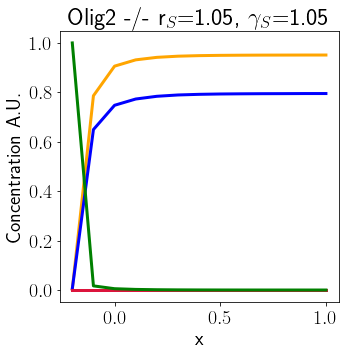

In [42]:
# O mutant

X0 = [1,1,0,0,1,1,0,0]
def ODEs(t, X, r_s, gamma_s, K_NI, K_OI, K_NP, K_OP, K_IO, K_NO, K_GO, K_IN, K_PN, K_ON, K_GN, K_LN, K_LP, K_LI, K_LO):
    
    # Ruben's Phi's
    phi_I = (((10**K_LI)*L)/(((10**K_LI)*L)+((1+(10**K_OI)*X[6])**2)*(1+(10**K_NI)*X[7])**2))
    phi_P = (((10**K_LP)*L)/(((10**K_LP)*L)+((1+(10**K_OP)*X[6])**2)*(1+(10**K_NP)*X[7])**2))
    phi_O = (((10**K_LO)*L*(1+c*(10**K_GO)*G))/(((10**K_LO)*L*(1+c*(10**K_GO)*G))+(1+(10**K_GO))*((1+(10**K_NO)*X[7])**2)*((1+(10**K_IO)*X[4])**2)))
    phi_N = (((10**K_LN)*L*(1+c*(10**K_GN)*G))/(((10**K_LN)*L*(1+c*(10**K_GN)*G))+(1+(10**K_GN))*((1+(10**K_ON)*X[6])**2)*((1+(10**K_IN)*X[4])**2)*((1+(10**K_PN)*X[5])**2)))
    
    dmI_dt = alpha_s*phi_I - alpha_s*X[0]
    dmP_dt = alpha_s*phi_P - alpha_s*X[1]
    dmO_dt = 0*phi_O - alpha_s*X[2]
    dmN_dt = alpha_s*phi_N - alpha_s*X[3]
   
    dI_dt = (10**r_s)*X[0] - (10**gamma_s)*X[4]
    dP_dt = (10**r_s)*X[1] - (10**gamma_s)*X[5]
    dO_dt = (10**r_s)*X[2] - (10**gamma_s)*X[6]
    dN_dt = (10**r_s)*X[3] - (10**gamma_s)*X[7]
    
    return np.array([dmI_dt, dmP_dt, dmO_dt, dmN_dt, dI_dt, dP_dt, dO_dt, dN_dt])

unloggedpeaks = np.array([1.05,1.05,76.2,58.8,26.7,1.9,28.4,60.6,18.0,47.1,4.8,27.1, 37.3,27.4, 4.80, 23.4, 47.8])
peaks = np.log10(unloggedpeaks)

ss=[]
for n in Gs:
    G=n
    go = simulate_data(peaks)
    ss.append((go[-1]))

ss=np.array(ss)

### plot ###
_, ax = plt.subplots()
ax.plot(x, ss[:, 0], "-", color="orange", label="[I]", linewidth=3.0)
ax.plot(x, ss[:, 1], "-", color="blue", label = "[P]", linewidth=3.0)
ax.plot(x, ss[:, 2], "-", color="crimson", label = "[O]", linewidth=3.0)
ax.plot(x, ss[:, 3], "-", color="green", label = "[N]", linewidth=3.0)
ax.set_xlabel("x")
ax.set_ylabel("Concentration A.U.")
ax.set_title("Olig2 -/- "+ 'r$\r_S$'+'=1.05'+ ', ' + r'$\gamma_S$'+'=1.05')
# ax.legend(loc ='upper right');
# plt.savefig('mutants/Rayon_mutants/O--.png')
plt.show()

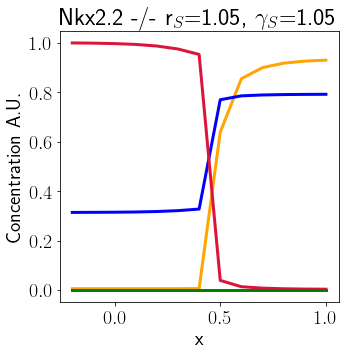

In [49]:
# N mutant

X0 = [1,1,0,0,1,1,0,0]
def ODEs(t, X, r_s, gamma_s, K_NI, K_OI, K_NP, K_OP, K_IO, K_NO, K_GO, K_IN, K_PN, K_ON, K_GN, K_LN, K_LP, K_LI, K_LO):
    
    # Ruben's Phi's
    phi_I = (((10**K_LI)*L)/(((10**K_LI)*L)+((1+(10**K_OI)*X[6])**2)*(1+(10**K_NI)*X[7])**2))
    phi_P = (((10**K_LP)*L)/(((10**K_LP)*L)+((1+(10**K_OP)*X[6])**2)*(1+(10**K_NP)*X[7])**2))
    phi_O = (((10**K_LO)*L*(1+c*(10**K_GO)*G))/(((10**K_LO)*L*(1+c*(10**K_GO)*G))+(1+(10**K_GO))*((1+(10**K_NO)*X[7])**2)*((1+(10**K_IO)*X[4])**2)))
    phi_N = (((10**K_LN)*L*(1+c*(10**K_GN)*G))/(((10**K_LN)*L*(1+c*(10**K_GN)*G))+(1+(10**K_GN))*((1+(10**K_ON)*X[6])**2)*((1+(10**K_IN)*X[4])**2)*((1+(10**K_PN)*X[5])**2)))
    
    dmI_dt = alpha_s*phi_I - alpha_s*X[0]
    dmP_dt = alpha_s*phi_P - alpha_s*X[1]
    dmO_dt = alpha_s*phi_O - alpha_s*X[2]
    dmN_dt = 0*phi_N - alpha_s*X[3]
   
    dI_dt = (10**r_s)*X[0] - (10**gamma_s)*X[4]
    dP_dt = (10**r_s)*X[1] - (10**gamma_s)*X[5]
    dO_dt = (10**r_s)*X[2] - (10**gamma_s)*X[6]
    dN_dt = (10**r_s)*X[3] - (10**gamma_s)*X[7]
    
    return np.array([dmI_dt, dmP_dt, dmO_dt, dmN_dt, dI_dt, dP_dt, dO_dt, dN_dt])

unloggedpeaks = np.array([1.05,1.05,76.2,58.8,26.7,1.9,28.4,60.6,18.0,47.1,4.8,27.1, 37.3,27.4, 4.80, 23.4, 47.8])
peaks = np.log10(unloggedpeaks)

ss=[]
for n in Gs:
    G=n
    go = simulate_data(peaks)
    ss.append((go[-1]))

ss=np.array(ss)

### plot ###
_, ax = plt.subplots()
ax.plot(x, ss[:, 0], "-", color="orange", label="[I]", linewidth=3.0)
ax.plot(x, ss[:, 1], "-", color="blue", label = "[P]", linewidth=3.0)
ax.plot(x, ss[:, 2], "-", color="crimson", label = "[O]", linewidth=3.0)
ax.plot(x, ss[:, 3], "-", color="green", label = "[N]", linewidth=3.0)
ax.set_xlabel("x")
ax.set_ylabel("Concentration A.U.")
ax.set_title("Nkx2.2 -/- "+ 'r$\r_S$'+'=1.05'+ ', ' + r'$\gamma_S$'+'=1.05')
# ax.legend(loc ='upper right');
# plt.savefig('mutants/Rayon_mutants/N--.png')
plt.show()

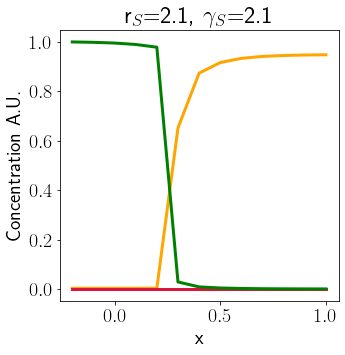

In [56]:
# P/O mutant

X0 = [1,0,0,0,1,0,0,0]
def ODEs(t, X, r_s, gamma_s, K_NI, K_OI, K_NP, K_OP, K_IO, K_NO, K_GO, K_IN, K_PN, K_ON, K_GN, K_LN, K_LP, K_LI, K_LO):
    
    # Ruben's Phi's
    phi_I = (((10**K_LI)*L)/(((10**K_LI)*L)+((1+(10**K_OI)*X[6])**2)*(1+(10**K_NI)*X[7])**2))
    phi_P = (((10**K_LP)*L)/(((10**K_LP)*L)+((1+(10**K_OP)*X[6])**2)*(1+(10**K_NP)*X[7])**2))
    phi_O = (((10**K_LO)*L*(1+c*(10**K_GO)*G))/(((10**K_LO)*L*(1+c*(10**K_GO)*G))+(1+(10**K_GO))*((1+(10**K_NO)*X[7])**2)*((1+(10**K_IO)*X[4])**2)))
    phi_N = (((10**K_LN)*L*(1+c*(10**K_GN)*G))/(((10**K_LN)*L*(1+c*(10**K_GN)*G))+(1+(10**K_GN))*((1+(10**K_ON)*X[6])**2)*((1+(10**K_IN)*X[4])**2)*((1+(10**K_PN)*X[5])**2)))
    
    dmI_dt = alpha_s*phi_I - alpha_s*X[0]
    dmP_dt = 0*phi_P - alpha_s*X[1]
    dmO_dt = 0*phi_O - alpha_s*X[2]
    dmN_dt = alpha_s*phi_N - alpha_s*X[3]
   
    dI_dt = (10**r_s)*X[0] - (10**gamma_s)*X[4]
    dP_dt = (10**r_s)*X[1] - (10**gamma_s)*X[5]
    dO_dt = (10**r_s)*X[2] - (10**gamma_s)*X[6]
    dN_dt = (10**r_s)*X[3] - (10**gamma_s)*X[7]
    
    return np.array([dmI_dt, dmP_dt, dmO_dt, dmN_dt, dI_dt, dP_dt, dO_dt, dN_dt])

unloggedpeaks = np.array([2.1,2.1,76.2,58.8,26.7,1.9,28.4,60.6,18.0,47.1,4.8,27.1, 37.3,27.4, 4.80, 23.4, 47.8])
peaks = np.log10(unloggedpeaks)

ss=[]
for n in Gs:
    G=n
    go = simulate_data(peaks)
    ss.append((go[-1]))

ss=np.array(ss)

### plot ###
_, ax = plt.subplots()
ax.plot(x, ss[:, 0], "-", color="orange", label="[I]", linewidth=3.0)
ax.plot(x, ss[:, 1], "-", color="blue", label = "[P]",linewidth=3.0)
ax.plot(x, ss[:, 2], "-", color="crimson", label = "[O]",linewidth=3.0)
ax.plot(x, ss[:, 3], "-", color="green", label = "[N]",linewidth=3.0)
ax.set_xlabel("x")
ax.set_ylabel("Concentration A.U.")
ax.set_title( 'r$\r_S$'+'=2.1'+ ', ' + r'$\gamma_S$'+'=2.1')
# ax.legend(loc ='upper right');
# plt.savefig('mutants/Rayon_mutants/P--O--.png')
plt.show()

[0.32221929 0.0211893  1.88195497 1.76937733 1.42651126 0.2787536
 1.45331834 1.78247262 1.25527251 1.67302091 0.68124124 1.43296929
 1.57170883 1.43775056 0.68124124 1.36921586 1.6794279 ]


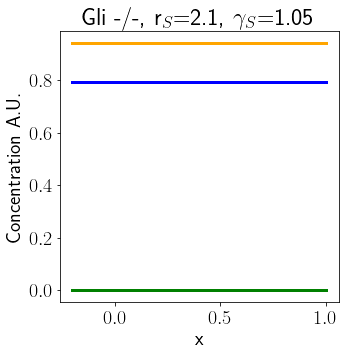

In [104]:
# Gli mutant
x = np.array([-0.2,-0.1,0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
Gs = np.exp(-x/0.15)

unloggedpeaks = np.array([2.1,1.05,76.2,58.8,26.7,1.9,28.4,60.6,18.0,47.1,4.8,27.1, 37.3,27.4, 4.80, 23.4, 47.8])
peaks = np.log10(unloggedpeaks)
print(peaks)

X0 = [1,1,0,0,1,1,0,0]
def ODEs(t, X, r_s, gamma_s, K_NI, K_OI, K_NP, K_OP, K_IO, K_NO, K_GO, K_IN, K_PN, K_ON, K_GN, K_LN, K_LP, K_LI, K_LO):

    
    # Ruben's Phi's
    phi_I = (((10**K_LI)*L)/(((10**K_LI)*L)+((1+(10**K_OI)*X[6])**2)*(1+(10**K_NI)*X[7])**2))
    phi_P = (((10**K_LP)*L)/(((10**K_LP)*L)+((1+(10**K_OP)*X[6])**2)*(1+(10**K_NP)*X[7])**2))
    phi_O = (((10**K_LO)*L*(1+c*(10**K_GO)*0))/(((10**K_LO)*L*(1+c*(10**K_GO)*0))+(1+(10**K_GO))*((1+(10**K_NO)*X[7])**2)*((1+(10**K_IO)*X[4])**2)))
    phi_N = (((10**K_LN)*L*(1+c*(10**K_GN)*0))/(((10**K_LN)*L*(1+c*(10**K_GN)*0))+(1+(10**K_GN))*((1+(10**K_ON)*X[6])**2)*((1+(10**K_IN)*X[4])**2)*((1+(10**K_PN)*X[5])**2)))
    
    dmI_dt = alpha_s*phi_I - alpha_s*X[0]
    dmP_dt = alpha_s*phi_P - alpha_s*X[1]
    dmO_dt = alpha_s*phi_O - alpha_s*X[2]
    dmN_dt = alpha_s*phi_N - alpha_s*X[3]
   
    dI_dt = (10**r_s)*X[0] - (10**gamma_s)*X[4]
    dP_dt = (10**r_s)*X[1] - (10**gamma_s)*X[5]
    dO_dt = (10**r_s)*X[2] - (10**gamma_s)*X[6]
    dN_dt = (10**r_s)*X[3] - (10**gamma_s)*X[7]
    
    return np.array([dmI_dt, dmP_dt, dmO_dt, dmN_dt, dI_dt, dP_dt, dO_dt, dN_dt])

ss=[]
for n in Gs:
    G=n
    go = simulate_data(peaks)
    ss.append((go[-1]))

ss=np.array(ss)

### plot ###
# plt.rcParams["figure.figsize"] = (5,5)
_, ax = plt.subplots()

ax.plot(x, ss[:, 0], "-", color="orange", label="[mI]", linewidth=3.0)
ax.plot(x, ss[:, 1], "-", color="blue", label = "[mP]", linewidth=3.0)
ax.plot(x, ss[:, 2], "-", color="crimson", label = "[mO]", linewidth=3.0)
ax.plot(x, ss[:, 3], "-", color="green", label = "[mN]", linewidth=3.0)
ax.set_xlabel("x")
ax.set_ylabel("Concentration A.U.")
ax.set_title("Gli -/-, "+ 'r$\r_S$'+'=2.1'+ ', ' + r'$\gamma_S$'+'=1.05')
# ax.legend(loc ='upper right');
# plt.savefig('mutants/Rayon_mutants/G--hooman2.png')
plt.show()

# Simulating spatial patterning for Hill function ODEs

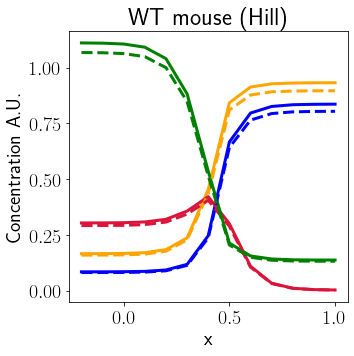

In [77]:
### HILL FUNCTION
rc('text', usetex=True)

def simulate_data(parameter_list):
    run= solve_ivp(ODEs, y0=X0, t_span = t_range, args =tuple(parameter_list), t_eval = timepts, dense_output=True) 
#     run_array = np.array(run.y[0:4]).T    
    run_array = np.array(run.y).T

    return run_array


# MOUSE
peaks = [0.11928677269000768, 0.13643945475097527, 0.3351360202714764, -1.1140869706983687, 0.554653979807722, -0.8213741222706683, -1.1596089849017646, 0.15415506068498216, 1.2884445158236952, -0.38135087605095475, 0.26308701866288686, -1.3491407338190875, 1.148885082927443, -2.053448423486971, -1.6664867067557476, -2.4858924568735, -0.8604512791014938]


# WT

def ODEs(t, X, r_s, gamma_s, K_NI, K_OI, K_NP, K_OP, K_IO, K_NO, K_GO, K_IN, K_PN, K_ON, K_GN, psiI, psiP, psiO, psiN):

    phi_I = (1/((1+((10**K_OI)*X[6])**2)*(1+((10**K_NI)*X[7])**2))+ (10**psiI))
    phi_P = (1/((1+((10**K_OP)*X[6])**2)*(1+((10**K_NP)*X[7])**2))+ (10**psiP))
    phi_O = ((((10**K_GO*G))**2)/((1+((10**K_IO)*X[4])**2)*(1+((10**K_NO)*X[7])**2)*(1+((10**K_GO)*G)**2)) + (10**psiO))
    phi_N = ((((10**K_GN*G))**2)/((1+((10**K_IN)*X[4])**2)*(1+((10**K_PN)*X[5])**2)*(1+((10**K_ON)*X[6])**2)*(1+((10**K_GN)*G)**2)) + (10**psiN))

    dmI_dt = alpha_s*phi_I - alpha_s*X[0]
    dmP_dt = alpha_s*phi_P - alpha_s*X[1]
    dmO_dt = alpha_s*phi_O - alpha_s*X[2]
    dmN_dt = alpha_s*phi_N - alpha_s*X[3]

    dI_dt = (10**r_s)*X[0] - (10**gamma_s)*X[4]
    dP_dt = (10**r_s)*X[1] - (10**gamma_s)*X[5]
    dO_dt = (10**r_s)*X[2] - (10**gamma_s)*X[6]
    dN_dt = (10**r_s)*X[3] - (10**gamma_s)*X[7]

    return np.array([dmI_dt, dmP_dt, dmO_dt, dmN_dt, dI_dt, dP_dt, dO_dt, dN_dt])

MOUSE=True

if MOUSE:
    # MOUSE INITIAL CONDITIONS - if mouse == True
    X0 = [0.9673932616381912, 0.9905698391107712, 0.22032352020457502, 0.006276499439069383,0.9673932616381912, 0.9905698391107712, 0.22032352020457502, 0.006276499439069383]
    t_range = [0.5, 7]
#     timepts=[0.5,1, 1.5, 2, 2.5, 3, 3.5, 4,5,6,7]
#     tpts = np.linspace(0.5,7,100)
    spec='mouse'

else:
    # HUMAN INITIAL CONDITIONS - if mouse == False
    X0 = [0.9978271229639294, 0.9976673744053118, 0.029296758259304223, 0.03117422425335577,0.9978271229639294, 0.9976673744053118, 0.029296758259304223, 0.03117422425335577]
    t_range = [2,15]
#     timepts=[2,4,5,6,7,8,9,10,11,12,13,14,15]
#     tpts = np.linspace(2,15,100)
    spec='human'


# X0 = [1,1,0,0,1,1,0,0]
timepts=[0.5,1, 1.5, 2, 2.5, 3, 3.5, 4,5,6,7,8,9,10,11,12,13,14,16,18,20]
t_range=[0.5,20]
alpha_s=100
x = np.array([-0.2,-0.1,0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
Gs = np.exp(-x/0.15)


ss=[]
for n in Gs:
    G=n
    go = simulate_data(peaks)
    ss.append((go[-1]))
ss=np.array(ss)

### plot ###
plt.rcParams.update({'font.size': 20})


## plot trajectories###
plt.rcParams["figure.figsize"] = (5,5)
_, ax = plt.subplots()
ax.plot(x, ss[:, 0], "-", color="orange", label="[mI]", linewidth=3.0)
ax.plot(x, ss[:, 1], "-", color="blue", label = "[mP]",linewidth=3.0)
ax.plot(x, ss[:, 2], "-", color="crimson", label = "[mO]",linewidth=3.0)
ax.plot(x, ss[:, 3], "-", color="green", label = "[mN]",linewidth=3.0)
ax.plot(x, ss[:, 4], "--", color="orange", label="[I]", linewidth=3.0)
ax.plot(x, ss[:, 5], "--", color="blue", label = "[P]",linewidth=3.0)
ax.plot(x, ss[:, 6], "--", color="crimson", label = "[O]",linewidth=3.0)
ax.plot(x, ss[:, 7], "--", color="green", label = "[N]",linewidth=3.0)


ax.set_xlabel("x")
ax.set_ylabel("Concentration A.U.")
ax.set_title('WT mouse (Hill)')
plt.savefig('mutants/Rayon_mutants/WT')
plt.show()


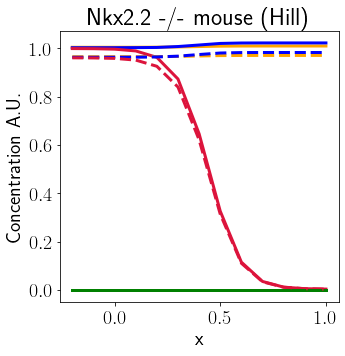

In [82]:
# Nkx2.2 -/-

# MOUSE

peaks = [0.11928677269000768, 0.13643945475097527, 0.3351360202714764, -1.1140869706983687, 0.554653979807722, -0.8213741222706683, -1.1596089849017646, 0.15415506068498216, 1.2884445158236952, -0.38135087605095475, 0.26308701866288686, -1.3491407338190875, 1.148885082927443, -2.053448423486971, -1.6664867067557476, -2.4858924568735, -0.8604512791014938]

# WT

def ODEs(t, X, r_s, gamma_s, K_NI, K_OI, K_NP, K_OP, K_IO, K_NO, K_GO, K_IN, K_PN, K_ON, K_GN, psiI, psiP, psiO, psiN):

    phi_I = (1/((1+((10**K_OI)*X[6])**2)*(1+((10**K_NI)*X[7])**2))+ (10**psiI))
    phi_P = (1/((1+((10**K_OP)*X[6])**2)*(1+((10**K_NP)*X[7])**2))+ (10**psiP))
    phi_O = ((((10**K_GO*G))**2)/((1+((10**K_IO)*X[4])**2)*(1+((10**K_NO)*X[7])**2)*(1+((10**K_GO)*G)**2)) + (10**psiO))
    phi_N = ((((10**K_GN*G))**2)/((1+((10**K_IN)*X[4])**2)*(1+((10**K_PN)*X[5])**2)*(1+((10**K_ON)*X[6])**2)*(1+((10**K_GN)*G)**2)) + (10**psiN))

    dmI_dt = alpha_s*phi_I - alpha_s*X[0]
    dmP_dt = alpha_s*phi_P - alpha_s*X[1]
    dmO_dt = alpha_s*phi_O - alpha_s*X[2]
    dmN_dt = 0*phi_N - alpha_s*X[3]

    dI_dt = (10**r_s)*X[0] - (10**gamma_s)*X[4]
    dP_dt = (10**r_s)*X[1] - (10**gamma_s)*X[5]
    dO_dt = (10**r_s)*X[2] - (10**gamma_s)*X[6]
    dN_dt = (10**r_s)*X[3] - (10**gamma_s)*X[7]

    return np.array([dmI_dt, dmP_dt, dmO_dt, dmN_dt, dI_dt, dP_dt, dO_dt, dN_dt])


# MOUSE INITIAL CONDITIONS - if mouse == True

## I P O N

X0 = [0.9673932616381912, 0.9905698391107712, 0.22032352020457502, 0,0.9673932616381912, 0.9905698391107712, 0.22032352020457502, 0]

timepts=[0.5,1, 1.5, 2, 2.5, 3, 3.5, 4,5,6,7,8,9,10,11,12,13,14,16,18,20]
t_range=[0.5,20]
alpha_s=100
x = np.array([-0.2,-0.1,0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
Gs = np.exp(-x/0.15)


ss=[]
for n in Gs:
    G=n
    go = simulate_data(peaks)
    ss.append((go[-1]))
ss=np.array(ss)

### plot ###
plt.rcParams.update({'font.size': 20})


## plot trajectories###
plt.rcParams["figure.figsize"] = (5,5)
_, ax = plt.subplots()
ax.plot(x, ss[:, 0], "-", color="orange", label="[mI]", linewidth=3.0)
ax.plot(x, ss[:, 1], "-", color="blue", label = "[mP]",linewidth=3.0)
ax.plot(x, ss[:, 2], "-", color="crimson", label = "[mO]",linewidth=3.0)
ax.plot(x, ss[:, 3], "-", color="green", label = "[mN]",linewidth=3.0)
ax.plot(x, ss[:, 4], "--", color="orange", label="[I]", linewidth=3.0)
ax.plot(x, ss[:, 5], "--", color="blue", label = "[P]",linewidth=3.0)
ax.plot(x, ss[:, 6], "--", color="crimson", label = "[O]",linewidth=3.0)
ax.plot(x, ss[:, 7], "--", color="green", label = "[N]",linewidth=3.0)


ax.set_xlabel("x")
ax.set_ylabel("Concentration A.U.")
ax.set_title('Nkx2.2 -/- mouse (Hill)')
plt.savefig('mutants/Rayon_mutants/WT')
plt.show()

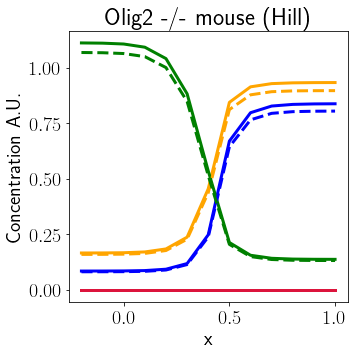

In [86]:
# Olig 2
X0 = [0.9673932616381912, 0.9905698391107712, 0, 0.006276499439069383,0.9673932616381912, 0.9905698391107712, 0, 0.006276499439069383]

# MOUSE
peaks = [0.11928677269000768, 0.13643945475097527, 0.3351360202714764, -1.1140869706983687, 0.554653979807722, -0.8213741222706683, -1.1596089849017646, 0.15415506068498216, 1.2884445158236952, -0.38135087605095475, 0.26308701866288686, -1.3491407338190875, 1.148885082927443, -2.053448423486971, -1.6664867067557476, -2.4858924568735, -0.8604512791014938]

def ODEs(t, X, r_s, gamma_s, K_NI, K_OI, K_NP, K_OP, K_IO, K_NO, K_GO, K_IN, K_PN, K_ON, K_GN, psiI, psiP, psiO, psiN):

    phi_I = (1/((1+((10**K_OI)*X[6])**2)*(1+((10**K_NI)*X[7])**2))+ (10**psiI))
    phi_P = (1/((1+((10**K_OP)*X[6])**2)*(1+((10**K_NP)*X[7])**2))+ (10**psiP))
    phi_O = ((((10**K_GO*G))**2)/((1+((10**K_IO)*X[4])**2)*(1+((10**K_NO)*X[7])**2)*(1+((10**K_GO)*G)**2)) + (10**psiO))
    phi_N = ((((10**K_GN*G))**2)/((1+((10**K_IN)*X[4])**2)*(1+((10**K_PN)*X[5])**2)*(1+((10**K_ON)*X[6])**2)*(1+((10**K_GN)*G)**2)) + (10**psiN))

    dmI_dt = alpha_s*phi_I - alpha_s*X[0]
    dmP_dt = alpha_s*phi_P - alpha_s*X[1]
    dmO_dt = 0*phi_O - alpha_s*X[2]
    dmN_dt = alpha_s*phi_N - alpha_s*X[3]

    dI_dt = (10**r_s)*X[0] - (10**gamma_s)*X[4]
    dP_dt = (10**r_s)*X[1] - (10**gamma_s)*X[5]
    dO_dt = (10**r_s)*X[2] - (10**gamma_s)*X[6]
    dN_dt = (10**r_s)*X[3] - (10**gamma_s)*X[7]

    return np.array([dmI_dt, dmP_dt, dmO_dt, dmN_dt, dI_dt, dP_dt, dO_dt, dN_dt])


ss=[]
for n in Gs:
    G=n
    go = simulate_data(peaks)
    ss.append((go[-1]))
ss=np.array(ss)

## plot trajectories###
plt.rcParams["figure.figsize"] = (5,5)
_, ax = plt.subplots()
ax.plot(x, ss[:, 0], "-", color="orange", label="[mI]", linewidth=3.0)
ax.plot(x, ss[:, 1], "-", color="blue", label = "[mP]",linewidth=3.0)
ax.plot(x, ss[:, 2], "-", color="crimson", label = "[mO]",linewidth=3.0)
ax.plot(x, ss[:, 3], "-", color="green", label = "[mN]",linewidth=3.0)
ax.plot(x, ss[:, 4], "--", color="orange", label="[I]", linewidth=3.0)
ax.plot(x, ss[:, 5], "--", color="blue", label = "[P]",linewidth=3.0)
ax.plot(x, ss[:, 6], "--", color="crimson", label = "[O]",linewidth=3.0)
ax.plot(x, ss[:, 7], "--", color="green", label = "[N]",linewidth=3.0)


ax.set_xlabel("x")
ax.set_ylabel("Concentration A.U.")
ax.set_title('Olig2 -/- mouse (Hill)')
plt.savefig('mutants/Rayon_mutants/WT')
plt.show()

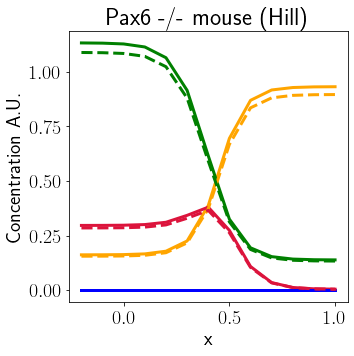

In [88]:
# Pax ko
X0 = [0.9673932616381912, 0, 0.22032352020457502, 0.006276499439069383,0.9673932616381912, 0, 0.22032352020457502, 0.006276499439069383]

# MOUSE
peaks = [0.11928677269000768, 0.13643945475097527, 0.3351360202714764, -1.1140869706983687, 0.554653979807722, -0.8213741222706683, -1.1596089849017646, 0.15415506068498216, 1.2884445158236952, -0.38135087605095475, 0.26308701866288686, -1.3491407338190875, 1.148885082927443, -2.053448423486971, -1.6664867067557476, -2.4858924568735, -0.8604512791014938]

def ODEs(t, X, r_s, gamma_s, K_NI, K_OI, K_NP, K_OP, K_IO, K_NO, K_GO, K_IN, K_PN, K_ON, K_GN, psiI, psiP, psiO, psiN):

    phi_I = (1/((1+((10**K_OI)*X[6])**2)*(1+((10**K_NI)*X[7])**2))+ (10**psiI))
    phi_P = (1/((1+((10**K_OP)*X[6])**2)*(1+((10**K_NP)*X[7])**2))+ (10**psiP))
    phi_O = ((((10**K_GO*G))**2)/((1+((10**K_IO)*X[4])**2)*(1+((10**K_NO)*X[7])**2)*(1+((10**K_GO)*G)**2)) + (10**psiO))
    phi_N = ((((10**K_GN*G))**2)/((1+((10**K_IN)*X[4])**2)*(1+((10**K_PN)*X[5])**2)*(1+((10**K_ON)*X[6])**2)*(1+((10**K_GN)*G)**2)) + (10**psiN))

    dmI_dt = alpha_s*phi_I - alpha_s*X[0]
    dmP_dt = 0*phi_P - alpha_s*X[1]
    dmO_dt = alpha_s*phi_O - alpha_s*X[2]
    dmN_dt = alpha_s*phi_N - alpha_s*X[3]

    dI_dt = (10**r_s)*X[0] - (10**gamma_s)*X[4]
    dP_dt = (10**r_s)*X[1] - (10**gamma_s)*X[5]
    dO_dt = (10**r_s)*X[2] - (10**gamma_s)*X[6]
    dN_dt = (10**r_s)*X[3] - (10**gamma_s)*X[7]

    return np.array([dmI_dt, dmP_dt, dmO_dt, dmN_dt, dI_dt, dP_dt, dO_dt, dN_dt])


ss=[]
for n in Gs:
    G=n
    go = simulate_data(peaks)
    ss.append((go[-1]))
ss=np.array(ss)

## plot trajectories###
plt.rcParams["figure.figsize"] = (5,5)
_, ax = plt.subplots()
ax.plot(x, ss[:, 0], "-", color="orange", label="[mI]", linewidth=3.0)
ax.plot(x, ss[:, 1], "-", color="blue", label = "[mP]",linewidth=3.0)
ax.plot(x, ss[:, 2], "-", color="crimson", label = "[mO]",linewidth=3.0)
ax.plot(x, ss[:, 3], "-", color="green", label = "[mN]",linewidth=3.0)
ax.plot(x, ss[:, 4], "--", color="orange", label="[I]", linewidth=3.0)
ax.plot(x, ss[:, 5], "--", color="blue", label = "[P]",linewidth=3.0)
ax.plot(x, ss[:, 6], "--", color="crimson", label = "[O]",linewidth=3.0)
ax.plot(x, ss[:, 7], "--", color="green", label = "[N]",linewidth=3.0)


ax.set_xlabel("x")
ax.set_ylabel("Concentration A.U.")
ax.set_title('Pax6 -/- mouse (Hill)')
plt.savefig('mutants/Rayon_mutants/WT')
plt.show()


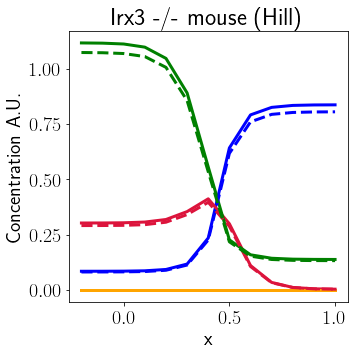

In [90]:
# Irx ko
X0 = [0, 0.9905698391107712, 0.22032352020457502, 0.006276499439069383,0, 0.9905698391107712, 0.22032352020457502, 0.006276499439069383]

# MOUSE
peaks = [0.11928677269000768, 0.13643945475097527, 0.3351360202714764, -1.1140869706983687, 0.554653979807722, -0.8213741222706683, -1.1596089849017646, 0.15415506068498216, 1.2884445158236952, -0.38135087605095475, 0.26308701866288686, -1.3491407338190875, 1.148885082927443, -2.053448423486971, -1.6664867067557476, -2.4858924568735, -0.8604512791014938]

def ODEs(t, X, r_s, gamma_s, K_NI, K_OI, K_NP, K_OP, K_IO, K_NO, K_GO, K_IN, K_PN, K_ON, K_GN, psiI, psiP, psiO, psiN):

    phi_I = (1/((1+((10**K_OI)*X[6])**2)*(1+((10**K_NI)*X[7])**2))+ (10**psiI))
    phi_P = (1/((1+((10**K_OP)*X[6])**2)*(1+((10**K_NP)*X[7])**2))+ (10**psiP))
    phi_O = ((((10**K_GO*G))**2)/((1+((10**K_IO)*X[4])**2)*(1+((10**K_NO)*X[7])**2)*(1+((10**K_GO)*G)**2)) + (10**psiO))
    phi_N = ((((10**K_GN*G))**2)/((1+((10**K_IN)*X[4])**2)*(1+((10**K_PN)*X[5])**2)*(1+((10**K_ON)*X[6])**2)*(1+((10**K_GN)*G)**2)) + (10**psiN))

    dmI_dt = 0*phi_I - alpha_s*X[0]
    dmP_dt = alpha_s*phi_P - alpha_s*X[1]
    dmO_dt = alpha_s*phi_O - alpha_s*X[2]
    dmN_dt = alpha_s*phi_N - alpha_s*X[3]

    dI_dt = (10**r_s)*X[0] - (10**gamma_s)*X[4]
    dP_dt = (10**r_s)*X[1] - (10**gamma_s)*X[5]
    dO_dt = (10**r_s)*X[2] - (10**gamma_s)*X[6]
    dN_dt = (10**r_s)*X[3] - (10**gamma_s)*X[7]

    return np.array([dmI_dt, dmP_dt, dmO_dt, dmN_dt, dI_dt, dP_dt, dO_dt, dN_dt])


ss=[]
for n in Gs:
    G=n
    go = simulate_data(peaks)
    ss.append((go[-1]))
ss=np.array(ss)

## plot trajectories###
plt.rcParams["figure.figsize"] = (5,5)
_, ax = plt.subplots()
ax.plot(x, ss[:, 0], "-", color="orange", label="[mI]", linewidth=3.0)
ax.plot(x, ss[:, 1], "-", color="blue", label = "[mP]",linewidth=3.0)
ax.plot(x, ss[:, 2], "-", color="crimson", label = "[mO]",linewidth=3.0)
ax.plot(x, ss[:, 3], "-", color="green", label = "[mN]",linewidth=3.0)
ax.plot(x, ss[:, 4], "--", color="orange", label="[I]", linewidth=3.0)
ax.plot(x, ss[:, 5], "--", color="blue", label = "[P]",linewidth=3.0)
ax.plot(x, ss[:, 6], "--", color="crimson", label = "[O]",linewidth=3.0)
ax.plot(x, ss[:, 7], "--", color="green", label = "[N]",linewidth=3.0)


ax.set_xlabel("x")
ax.set_ylabel("Concentration A.U.")
ax.set_title('Irx3 -/- mouse (Hill)')
plt.savefig('mutants/Rayon_mutants/WT')
plt.show()

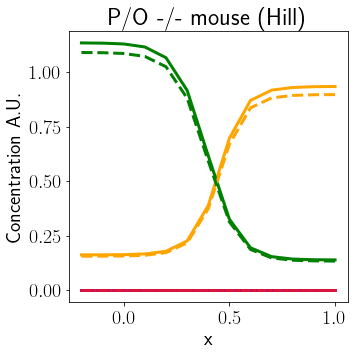

In [98]:
# Pax/ Olig ko
X0 = [0.9673932616381912, 0, 0, 0.006276499439069383,0.9673932616381912, 0, 0, 0.006276499439069383]

# MOUSE
peaks = [0.11928677269000768, 0.13643945475097527, 0.3351360202714764, -1.1140869706983687, 0.554653979807722, -0.8213741222706683, -1.1596089849017646, 0.15415506068498216, 1.2884445158236952, -0.38135087605095475, 0.26308701866288686, -1.3491407338190875, 1.148885082927443, -2.053448423486971, -1.6664867067557476, -2.4858924568735, -0.8604512791014938]

def ODEs(t, X, r_s, gamma_s, K_NI, K_OI, K_NP, K_OP, K_IO, K_NO, K_GO, K_IN, K_PN, K_ON, K_GN, psiI, psiP, psiO, psiN):

    phi_I = (1/((1+((10**K_OI)*X[6])**2)*(1+((10**K_NI)*X[7])**2))+ (10**psiI))
    phi_P = (1/((1+((10**K_OP)*X[6])**2)*(1+((10**K_NP)*X[7])**2))+ (10**psiP))
    phi_O = ((((10**K_GO*G))**2)/((1+((10**K_IO)*X[4])**2)*(1+((10**K_NO)*X[7])**2)*(1+((10**K_GO)*G)**2)) + (10**psiO))
    phi_N = ((((10**K_GN*G))**2)/((1+((10**K_IN)*X[4])**2)*(1+((10**K_PN)*X[5])**2)*(1+((10**K_ON)*X[6])**2)*(1+((10**K_GN)*G)**2)) + (10**psiN))

    dmI_dt = alpha_s*phi_I - alpha_s*X[0]
    dmP_dt = 0*phi_P - alpha_s*X[1]
    dmO_dt = 0*phi_O - alpha_s*X[2]
    dmN_dt = alpha_s*phi_N - alpha_s*X[3]

    dI_dt = (10**r_s)*X[0] - (10**gamma_s)*X[4]
    dP_dt = (10**r_s)*X[1] - (10**gamma_s)*X[5]
    dO_dt = (10**r_s)*X[2] - (10**gamma_s)*X[6]
    dN_dt = (10**r_s)*X[3] - (10**gamma_s)*X[7]

    return np.array([dmI_dt, dmP_dt, dmO_dt, dmN_dt, dI_dt, dP_dt, dO_dt, dN_dt])


ss=[]
for n in Gs:
    G=n
    go = simulate_data(peaks)
    ss.append((go[-1]))
ss=np.array(ss)

## plot trajectories###
plt.rcParams["figure.figsize"] = (5,5)
_, ax = plt.subplots()
ax.plot(x, ss[:, 0], "-", color="orange", label="[mI]", linewidth=3.0)
ax.plot(x, ss[:, 1], "-", color="blue", label = "[mP]",linewidth=3.0)
ax.plot(x, ss[:, 2], "-", color="crimson", label = "[mO]",linewidth=3.0)
ax.plot(x, ss[:, 3], "-", color="green", label = "[mN]",linewidth=3.0)
ax.plot(x, ss[:, 4], "--", color="orange", label="[I]", linewidth=3.0)
ax.plot(x, ss[:, 5], "--", color="blue", label = "[P]",linewidth=3.0)
ax.plot(x, ss[:, 6], "--", color="crimson", label = "[O]",linewidth=3.0)
ax.plot(x, ss[:, 7], "--", color="green", label = "[N]",linewidth=3.0)


ax.set_xlabel("x")
ax.set_ylabel("Concentration A.U.")
ax.set_title('P/O -/- mouse (Hill)')
plt.savefig('mutants/Rayon_mutants/WT')
plt.show()

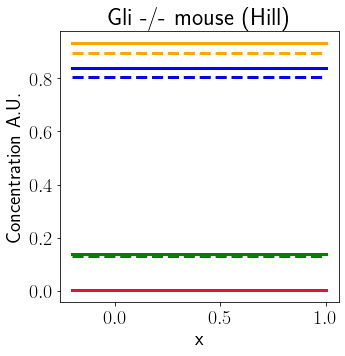

In [105]:
# Gli ko
X0 = [0.9673932616381912, 0.9905698391107712, 0.22032352020457502, 0.006276499439069383,0.9673932616381912, 0.9905698391107712, 0.22032352020457502, 0.006276499439069383]

# MOUSE
peaks = [0.11928677269000768, 0.13643945475097527, 0.3351360202714764, -1.1140869706983687, 0.554653979807722, -0.8213741222706683, -1.1596089849017646, 0.15415506068498216, 1.2884445158236952, -0.38135087605095475, 0.26308701866288686, -1.3491407338190875, 1.148885082927443, -2.053448423486971, -1.6664867067557476, -2.4858924568735, -0.8604512791014938]

def ODEs(t, X, r_s, gamma_s, K_NI, K_OI, K_NP, K_OP, K_IO, K_NO, K_GO, K_IN, K_PN, K_ON, K_GN, psiI, psiP, psiO, psiN):

    phi_I = (1/((1+((10**K_OI)*X[6])**2)*(1+((10**K_NI)*X[7])**2))+ (10**psiI))
    phi_P = (1/((1+((10**K_OP)*X[6])**2)*(1+((10**K_NP)*X[7])**2))+ (10**psiP))
    phi_O = ((((10**0*0))**2)/((1+((10**K_IO)*X[4])**2)*(1+((10**K_NO)*X[7])**2)*(1+((10**0)*0)**2)) + (10**psiO))
    phi_N = ((((10**0*0))**2)/((1+((10**K_IN)*X[4])**2)*(1+((10**K_PN)*X[5])**2)*(1+((10**K_ON)*X[6])**2)*(1+((10**0)*0)**2)) + (10**psiN))

    dmI_dt = alpha_s*phi_I - alpha_s*X[0]
    dmP_dt = alpha_s*phi_P - alpha_s*X[1]
    dmO_dt = alpha_s*phi_O - alpha_s*X[2]
    dmN_dt = alpha_s*phi_N - alpha_s*X[3]

    dI_dt = (10**r_s)*X[0] - (10**gamma_s)*X[4]
    dP_dt = (10**r_s)*X[1] - (10**gamma_s)*X[5]
    dO_dt = (10**r_s)*X[2] - (10**gamma_s)*X[6]
    dN_dt = (10**r_s)*X[3] - (10**gamma_s)*X[7]

    return np.array([dmI_dt, dmP_dt, dmO_dt, dmN_dt, dI_dt, dP_dt, dO_dt, dN_dt])


ss=[]
for n in Gs:
    G=n
    go = simulate_data(peaks)
    ss.append((go[-1]))
ss=np.array(ss)

## plot trajectories###
plt.rcParams["figure.figsize"] = (5,5)
_, ax = plt.subplots()
ax.plot(x, ss[:, 0], "-", color="orange", label="[mI]", linewidth=3.0)
ax.plot(x, ss[:, 1], "-", color="blue", label = "[mP]",linewidth=3.0)
ax.plot(x, ss[:, 2], "-", color="crimson", label = "[mO]",linewidth=3.0)
ax.plot(x, ss[:, 3], "-", color="green", label = "[mN]",linewidth=3.0)
ax.plot(x, ss[:, 4], "--", color="orange", label="[I]", linewidth=3.0)
ax.plot(x, ss[:, 5], "--", color="blue", label = "[P]",linewidth=3.0)
ax.plot(x, ss[:, 6], "--", color="crimson", label = "[O]",linewidth=3.0)
ax.plot(x, ss[:, 7], "--", color="green", label = "[N]",linewidth=3.0)


ax.set_xlabel("x")
ax.set_ylabel("Concentration A.U.")
ax.set_title('Gli -/- mouse (Hill)')
plt.savefig('mutants/Rayon_mutants/WT')
plt.show()

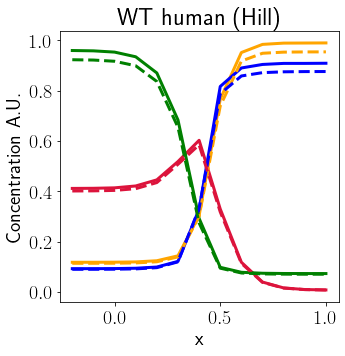

In [78]:
# HUMAN
timepts=[0.5,1, 1.5, 2, 2.5, 3, 3.5, 4,5,6,7,8,9,10,11,12,13,14,16,18,20]
t_range=[0.5,20]
alpha_s=100
x = np.array([-0.2,-0.1,0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
Gs = np.exp(-x/0.15)
peaks = [-0.27486732574316436, -0.2591047495617689, 0.6399389706904807, 0.18714034258181256, 0.7812142210598854, -1.7408165619204903, -0.34133876322069007, 0.11800724654229139, 1.327124483619135, 0.4906419235956352, -1.2142767941798462, -0.8888946937574329, 1.081736738931927, -1.1214705469400137, -1.2140511880713094, -2.1534471603227994, -1.1380675808521947]
MOUSE=False
if MOUSE:
    # MOUSE INITIAL CONDITIONS - if mouse == True
    X0 = [0.9673932616381912, 0.9905698391107712, 0.22032352020457502, 0.006276499439069383,0.9673932616381912, 0.9905698391107712, 0.22032352020457502, 0.006276499439069383]
#     t_range = [0.5, 7]
#     timepts=[0.5,1, 1.5, 2, 2.5, 3, 3.5, 4,5,6,7]
#     tpts = np.linspace(0.5,7,100)
    spec='mouse'

else:
    # HUMAN INITIAL CONDITIONS - if mouse == False
    X0 = [0.9978271229639294, 0.9976673744053118, 0.029296758259304223, 0.03117422425335577,0.9978271229639294, 0.9976673744053118, 0.029296758259304223, 0.03117422425335577]


### plot ###
plt.rcParams.update({'font.size': 20})


ss=[]
for n in Gs:
    G=n
    go = simulate_data(peaks)
    ss.append((go[-1]))
ss=np.array(ss)

## plot trajectories###
plt.rcParams["figure.figsize"] = (5,5)
_, ax = plt.subplots()
ax.plot(x, ss[:, 0], "-", color="orange", label="[mI]", linewidth=3.0)
ax.plot(x, ss[:, 1], "-", color="blue", label = "[mP]",linewidth=3.0)
ax.plot(x, ss[:, 2], "-", color="crimson", label = "[mO]",linewidth=3.0)
ax.plot(x, ss[:, 3], "-", color="green", label = "[mN]",linewidth=3.0)
ax.plot(x, ss[:, 4], "--", color="orange", label="[I]", linewidth=3.0)
ax.plot(x, ss[:, 5], "--", color="blue", label = "[P]",linewidth=3.0)
ax.plot(x, ss[:, 6], "--", color="crimson", label = "[O]",linewidth=3.0)
ax.plot(x, ss[:, 7], "--", color="green", label = "[N]",linewidth=3.0)


ax.set_xlabel("x")
ax.set_ylabel("Concentration A.U.")
ax.set_title('WT human (Hill)')
plt.savefig('mutants/Rayon_mutants/WT')
plt.show()


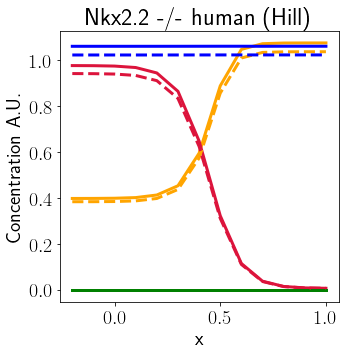

In [85]:
# Nkx2.2 -/-/ human
peaks = [-0.27486732574316436, -0.2591047495617689, 0.6399389706904807, 0.18714034258181256, 0.7812142210598854, -1.7408165619204903, -0.34133876322069007, 0.11800724654229139, 1.327124483619135, 0.4906419235956352, -1.2142767941798462, -0.8888946937574329, 1.081736738931927, -1.1214705469400137, -1.2140511880713094, -2.1534471603227994, -1.1380675808521947]
X0 = [0.9978271229639294, 0.9976673744053118, 0.029296758259304223, 0,0.9978271229639294, 0.9976673744053118, 0.029296758259304223, 0]


def ODEs(t, X, r_s, gamma_s, K_NI, K_OI, K_NP, K_OP, K_IO, K_NO, K_GO, K_IN, K_PN, K_ON, K_GN, psiI, psiP, psiO, psiN):

    phi_I = (1/((1+((10**K_OI)*X[6])**2)*(1+((10**K_NI)*X[7])**2))+ (10**psiI))
    phi_P = (1/((1+((10**K_OP)*X[6])**2)*(1+((10**K_NP)*X[7])**2))+ (10**psiP))
    phi_O = ((((10**K_GO*G))**2)/((1+((10**K_IO)*X[4])**2)*(1+((10**K_NO)*X[7])**2)*(1+((10**K_GO)*G)**2)) + (10**psiO))
    phi_N = ((((10**K_GN*G))**2)/((1+((10**K_IN)*X[4])**2)*(1+((10**K_PN)*X[5])**2)*(1+((10**K_ON)*X[6])**2)*(1+((10**K_GN)*G)**2)) + (10**psiN))

    dmI_dt = alpha_s*phi_I - alpha_s*X[0]
    dmP_dt = alpha_s*phi_P - alpha_s*X[1]
    dmO_dt = alpha_s*phi_O - alpha_s*X[2]
    dmN_dt = 0*phi_N - alpha_s*X[3]

    dI_dt = (10**r_s)*X[0] - (10**gamma_s)*X[4]
    dP_dt = (10**r_s)*X[1] - (10**gamma_s)*X[5]
    dO_dt = (10**r_s)*X[2] - (10**gamma_s)*X[6]
    dN_dt = (10**r_s)*X[3] - (10**gamma_s)*X[7]

    return np.array([dmI_dt, dmP_dt, dmO_dt, dmN_dt, dI_dt, dP_dt, dO_dt, dN_dt])


# MOUSE INITIAL CONDITIONS - if mouse == True

## I P O N


timepts=[0.5,1, 1.5, 2, 2.5, 3, 3.5, 4,5,6,7,8,9,10,11,12,13,14,16,18,20]
t_range=[0.5,20]
alpha_s=100
x = np.array([-0.2,-0.1,0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
Gs = np.exp(-x/0.15)


ss=[]
for n in Gs:
    G=n
    go = simulate_data(peaks)
    ss.append((go[-1]))
ss=np.array(ss)

### plot ###
plt.rcParams.update({'font.size': 20})


## plot trajectories###
plt.rcParams["figure.figsize"] = (5,5)
_, ax = plt.subplots()
ax.plot(x, ss[:, 0], "-", color="orange", label="[mI]", linewidth=3.0)
ax.plot(x, ss[:, 1], "-", color="blue", label = "[mP]",linewidth=3.0)
ax.plot(x, ss[:, 2], "-", color="crimson", label = "[mO]",linewidth=3.0)
ax.plot(x, ss[:, 3], "-", color="green", label = "[mN]",linewidth=3.0)
ax.plot(x, ss[:, 4], "--", color="orange", label="[I]", linewidth=3.0)
ax.plot(x, ss[:, 5], "--", color="blue", label = "[P]",linewidth=3.0)
ax.plot(x, ss[:, 6], "--", color="crimson", label = "[O]",linewidth=3.0)
ax.plot(x, ss[:, 7], "--", color="green", label = "[N]",linewidth=3.0)


ax.set_xlabel("x")
ax.set_ylabel("Concentration A.U.")
ax.set_title('Nkx2.2 -/- human (Hill)')
plt.savefig('mutants/Rayon_mutants/WT')
plt.show()

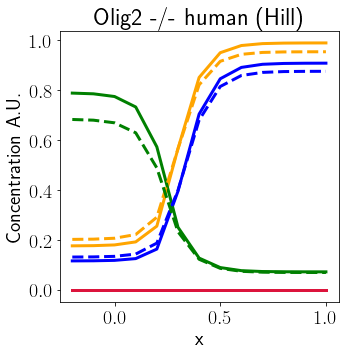

In [95]:
# Olig
X0 = [0.9978271229639294, 0.9976673744053118, 0, 0.03117422425335577,0.9978271229639294, 0.9976673744053118, 0, 0.03117422425335577]
peaks = [-0.27486732574316436, -0.2591047495617689, 0.6399389706904807, 0.18714034258181256, 0.7812142210598854, -1.7408165619204903, -0.34133876322069007, 0.11800724654229139, 1.327124483619135, 0.4906419235956352, -1.2142767941798462, -0.8888946937574329, 1.081736738931927, -1.1214705469400137, -1.2140511880713094, -2.1534471603227994, -1.1380675808521947]

# HUMAN
timepts=[0.5,1, 1.5, 2, 2.5, 3, 3.5, 4,5,6,7,8,9,10,11,12,13,14,16,18,20]
t_range=[0.5,20]
alpha_s=100
x = np.array([-0.2,-0.1,0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
Gs = np.exp(-x/0.15)

# ODEs

def ODEs(t, X, r_s, gamma_s, K_NI, K_OI, K_NP, K_OP, K_IO, K_NO, K_GO, K_IN, K_PN, K_ON, K_GN, psiI, psiP, psiO, psiN):

    phi_I = (1/((1+((10**K_OI)*X[6])**2)*(1+((10**K_NI)*X[7])**2))+ (10**psiI))
    phi_P = (1/((1+((10**K_OP)*X[6])**2)*(1+((10**K_NP)*X[7])**2))+ (10**psiP))
    phi_O = ((((10**K_GO*G))**2)/((1+((10**K_IO)*X[4])**2)*(1+((10**K_NO)*X[7])**2)*(1+((10**K_GO)*G)**2)) + (10**psiO))
    phi_N = ((((10**K_GN*G))**2)/((1+((10**K_IN)*X[4])**2)*(1+((10**K_PN)*X[5])**2)*(1+((10**K_ON)*X[6])**2)*(1+((10**K_GN)*G)**2)) + (10**psiN))

    dmI_dt = alpha_s*phi_I - alpha_s*X[0]
    dmP_dt = alpha_s*phi_P - alpha_s*X[1]
    dmO_dt = 0*phi_O - alpha_s*X[2]
    dmN_dt = alpha_s*phi_N - alpha_s*X[3]

    dI_dt = (10**r_s)*X[0] - (10**gamma_s)*X[4]
    dP_dt = (10**r_s)*X[1] - (10**gamma_s)*X[5]
    dO_dt = (10**r_s)*X[2] - (10**gamma_s)*X[6]
    dN_dt = (10**r_s)*X[3] - (10**gamma_s)*X[7]

    return np.array([dmI_dt, dmP_dt, dmO_dt, dmN_dt, dI_dt, dP_dt, dO_dt, dN_dt])


### plot ###

ss=[]
for n in Gs:
    G=n
    go = simulate_data(peaks)
    ss.append((go[-1]))
ss=np.array(ss)

## plot trajectories###
plt.rcParams["figure.figsize"] = (5,5)
_, ax = plt.subplots()
ax.plot(x, ss[:, 0], "-", color="orange", label="[mI]", linewidth=3.0)
ax.plot(x, ss[:, 1], "-", color="blue", label = "[mP]",linewidth=3.0)
ax.plot(x, ss[:, 2], "-", color="crimson", label = "[mO]",linewidth=3.0)
ax.plot(x, ss[:, 3], "-", color="green", label = "[mN]",linewidth=3.0)
ax.plot(x, ss[:, 4], "--", color="orange", label="[I]", linewidth=3.0)
ax.plot(x, ss[:, 5], "--", color="blue", label = "[P]",linewidth=3.0)
ax.plot(x, ss[:, 6], "--", color="crimson", label = "[O]",linewidth=3.0)
ax.plot(x, ss[:, 7], "--", color="green", label = "[N]",linewidth=3.0)


ax.set_xlabel("x")
ax.set_ylabel("Concentration A.U.")
ax.set_title('Olig2 -/- human (Hill)')
plt.savefig('mutants/Rayon_mutants/WT')
plt.show()

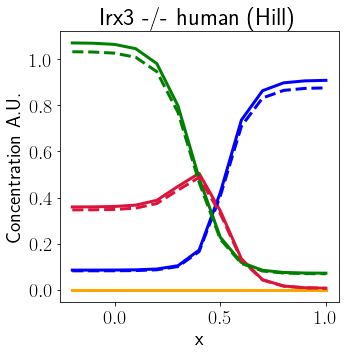

In [96]:
# Irx 3 
# Olig
X0 = [0, 0.9976673744053118, 0.029296758259304223, 0.03117422425335577,0, 0.9976673744053118, 0.029296758259304223, 0.03117422425335577]
peaks = [-0.27486732574316436, -0.2591047495617689, 0.6399389706904807, 0.18714034258181256, 0.7812142210598854, -1.7408165619204903, -0.34133876322069007, 0.11800724654229139, 1.327124483619135, 0.4906419235956352, -1.2142767941798462, -0.8888946937574329, 1.081736738931927, -1.1214705469400137, -1.2140511880713094, -2.1534471603227994, -1.1380675808521947]

# HUMAN
timepts=[0.5,1, 1.5, 2, 2.5, 3, 3.5, 4,5,6,7,8,9,10,11,12,13,14,16,18,20]
t_range=[0.5,20]
alpha_s=100
x = np.array([-0.2,-0.1,0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
Gs = np.exp(-x/0.15)

# ODEs

def ODEs(t, X, r_s, gamma_s, K_NI, K_OI, K_NP, K_OP, K_IO, K_NO, K_GO, K_IN, K_PN, K_ON, K_GN, psiI, psiP, psiO, psiN):

    phi_I = (1/((1+((10**K_OI)*X[6])**2)*(1+((10**K_NI)*X[7])**2))+ (10**psiI))
    phi_P = (1/((1+((10**K_OP)*X[6])**2)*(1+((10**K_NP)*X[7])**2))+ (10**psiP))
    phi_O = ((((10**K_GO*G))**2)/((1+((10**K_IO)*X[4])**2)*(1+((10**K_NO)*X[7])**2)*(1+((10**K_GO)*G)**2)) + (10**psiO))
    phi_N = ((((10**K_GN*G))**2)/((1+((10**K_IN)*X[4])**2)*(1+((10**K_PN)*X[5])**2)*(1+((10**K_ON)*X[6])**2)*(1+((10**K_GN)*G)**2)) + (10**psiN))

    dmI_dt = 0*phi_I - alpha_s*X[0]
    dmP_dt = alpha_s*phi_P - alpha_s*X[1]
    dmO_dt = alpha_s*phi_O - alpha_s*X[2]
    dmN_dt = alpha_s*phi_N - alpha_s*X[3]

    dI_dt = (10**r_s)*X[0] - (10**gamma_s)*X[4]
    dP_dt = (10**r_s)*X[1] - (10**gamma_s)*X[5]
    dO_dt = (10**r_s)*X[2] - (10**gamma_s)*X[6]
    dN_dt = (10**r_s)*X[3] - (10**gamma_s)*X[7]

    return np.array([dmI_dt, dmP_dt, dmO_dt, dmN_dt, dI_dt, dP_dt, dO_dt, dN_dt])


### plot ###

ss=[]
for n in Gs:
    G=n
    go = simulate_data(peaks)
    ss.append((go[-1]))
ss=np.array(ss)

## plot trajectories###
plt.rcParams["figure.figsize"] = (5,5)
_, ax = plt.subplots()
ax.plot(x, ss[:, 0], "-", color="orange", label="[mI]", linewidth=3.0)
ax.plot(x, ss[:, 1], "-", color="blue", label = "[mP]",linewidth=3.0)
ax.plot(x, ss[:, 2], "-", color="crimson", label = "[mO]",linewidth=3.0)
ax.plot(x, ss[:, 3], "-", color="green", label = "[mN]",linewidth=3.0)
ax.plot(x, ss[:, 4], "--", color="orange", label="[I]", linewidth=3.0)
ax.plot(x, ss[:, 5], "--", color="blue", label = "[P]",linewidth=3.0)
ax.plot(x, ss[:, 6], "--", color="crimson", label = "[O]",linewidth=3.0)
ax.plot(x, ss[:, 7], "--", color="green", label = "[N]",linewidth=3.0)


ax.set_xlabel("x")
ax.set_ylabel("Concentration A.U.")
ax.set_title('Irx3 -/- human (Hill)')
plt.savefig('mutants/Rayon_mutants/WT')
plt.show()

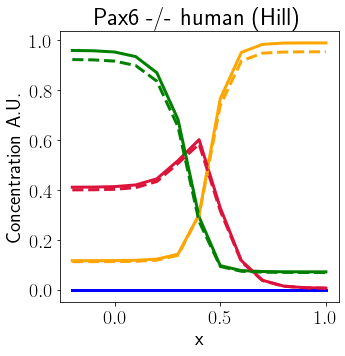

In [106]:
# pax 6 
X0 = [0.9978271229639294, 0, 0.029296758259304223, 0.03117422425335577,0.9978271229639294, 0, 0.029296758259304223, 0.03117422425335577]
peaks = [-0.27486732574316436, -0.2591047495617689, 0.6399389706904807, 0.18714034258181256, 0.7812142210598854, -1.7408165619204903, -0.34133876322069007, 0.11800724654229139, 1.327124483619135, 0.4906419235956352, -1.2142767941798462, -0.8888946937574329, 1.081736738931927, -1.1214705469400137, -1.2140511880713094, -2.1534471603227994, -1.1380675808521947]

# HUMAN
timepts=[0.5,1, 1.5, 2, 2.5, 3, 3.5, 4,5,6,7,8,9,10,11,12,13,14,16,18,20]
t_range=[0.5,20]
alpha_s=100
x = np.array([-0.2,-0.1,0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
Gs = np.exp(-x/0.15)

# ODEs

def ODEs(t, X, r_s, gamma_s, K_NI, K_OI, K_NP, K_OP, K_IO, K_NO, K_GO, K_IN, K_PN, K_ON, K_GN, psiI, psiP, psiO, psiN):

    phi_I = (1/((1+((10**K_OI)*X[6])**2)*(1+((10**K_NI)*X[7])**2))+ (10**psiI))
    phi_P = (1/((1+((10**K_OP)*X[6])**2)*(1+((10**K_NP)*X[7])**2))+ (10**psiP))
    phi_O = ((((10**K_GO*G))**2)/((1+((10**K_IO)*X[4])**2)*(1+((10**K_NO)*X[7])**2)*(1+((10**K_GO)*G)**2)) + (10**psiO))
    phi_N = ((((10**K_GN*G))**2)/((1+((10**K_IN)*X[4])**2)*(1+((10**K_PN)*X[5])**2)*(1+((10**K_ON)*X[6])**2)*(1+((10**K_GN)*G)**2)) + (10**psiN))

    dmI_dt = alpha_s*phi_I - alpha_s*X[0]
    dmP_dt = 0*phi_P - alpha_s*X[1]
    dmO_dt = alpha_s*phi_O - alpha_s*X[2]
    dmN_dt = alpha_s*phi_N - alpha_s*X[3]

    dI_dt = (10**r_s)*X[0] - (10**gamma_s)*X[4]
    dP_dt = (10**r_s)*X[1] - (10**gamma_s)*X[5]
    dO_dt = (10**r_s)*X[2] - (10**gamma_s)*X[6]
    dN_dt = (10**r_s)*X[3] - (10**gamma_s)*X[7]

    return np.array([dmI_dt, dmP_dt, dmO_dt, dmN_dt, dI_dt, dP_dt, dO_dt, dN_dt])


### plot ###

ss=[]
for n in Gs:
    G=n
    go = simulate_data(peaks)
    ss.append((go[-1]))
ss=np.array(ss)

## plot trajectories###
plt.rcParams["figure.figsize"] = (5,5)
_, ax = plt.subplots()
ax.plot(x, ss[:, 0], "-", color="orange", label="[mI]", linewidth=3.0)
ax.plot(x, ss[:, 1], "-", color="blue", label = "[mP]",linewidth=3.0)
ax.plot(x, ss[:, 2], "-", color="crimson", label = "[mO]",linewidth=3.0)
ax.plot(x, ss[:, 3], "-", color="green", label = "[mN]",linewidth=3.0)
ax.plot(x, ss[:, 4], "--", color="orange", label="[I]", linewidth=3.0)
ax.plot(x, ss[:, 5], "--", color="blue", label = "[P]",linewidth=3.0)
ax.plot(x, ss[:, 6], "--", color="crimson", label = "[O]",linewidth=3.0)
ax.plot(x, ss[:, 7], "--", color="green", label = "[N]",linewidth=3.0)


ax.set_xlabel("x")
ax.set_ylabel("Concentration A.U.")
ax.set_title('Pax6 -/- human (Hill)')
plt.savefig('mutants/Rayon_mutants/WT')
plt.show()

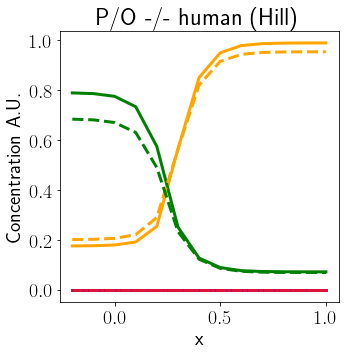

In [97]:
# PO 

X0 = [0.9978271229639294, 0, 0, 0.03117422425335577,0.9978271229639294, 0, 0, 0.03117422425335577]
peaks = [-0.27486732574316436, -0.2591047495617689, 0.6399389706904807, 0.18714034258181256, 0.7812142210598854, -1.7408165619204903, -0.34133876322069007, 0.11800724654229139, 1.327124483619135, 0.4906419235956352, -1.2142767941798462, -0.8888946937574329, 1.081736738931927, -1.1214705469400137, -1.2140511880713094, -2.1534471603227994, -1.1380675808521947]

# HUMAN
timepts=[0.5,1, 1.5, 2, 2.5, 3, 3.5, 4,5,6,7,8,9,10,11,12,13,14,16,18,20]
t_range=[0.5,20]
alpha_s=100
x = np.array([-0.2,-0.1,0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
Gs = np.exp(-x/0.15)

# ODEs

def ODEs(t, X, r_s, gamma_s, K_NI, K_OI, K_NP, K_OP, K_IO, K_NO, K_GO, K_IN, K_PN, K_ON, K_GN, psiI, psiP, psiO, psiN):

    phi_I = (1/((1+((10**K_OI)*X[6])**2)*(1+((10**K_NI)*X[7])**2))+ (10**psiI))
    phi_P = (1/((1+((10**K_OP)*X[6])**2)*(1+((10**K_NP)*X[7])**2))+ (10**psiP))
    phi_O = ((((10**K_GO*G))**2)/((1+((10**K_IO)*X[4])**2)*(1+((10**K_NO)*X[7])**2)*(1+((10**K_GO)*G)**2)) + (10**psiO))
    phi_N = ((((10**K_GN*G))**2)/((1+((10**K_IN)*X[4])**2)*(1+((10**K_PN)*X[5])**2)*(1+((10**K_ON)*X[6])**2)*(1+((10**K_GN)*G)**2)) + (10**psiN))

    dmI_dt = alpha_s*phi_I - alpha_s*X[0]
    dmP_dt = 0*phi_P - alpha_s*X[1]
    dmO_dt = 0*phi_O - alpha_s*X[2]
    dmN_dt = alpha_s*phi_N - alpha_s*X[3]

    dI_dt = (10**r_s)*X[0] - (10**gamma_s)*X[4]
    dP_dt = (10**r_s)*X[1] - (10**gamma_s)*X[5]
    dO_dt = (10**r_s)*X[2] - (10**gamma_s)*X[6]
    dN_dt = (10**r_s)*X[3] - (10**gamma_s)*X[7]

    return np.array([dmI_dt, dmP_dt, dmO_dt, dmN_dt, dI_dt, dP_dt, dO_dt, dN_dt])


### plot ###

ss=[]
for n in Gs:
    G=n
    go = simulate_data(peaks)
    ss.append((go[-1]))
ss=np.array(ss)

## plot trajectories###
plt.rcParams["figure.figsize"] = (5,5)
_, ax = plt.subplots()
ax.plot(x, ss[:, 0], "-", color="orange", label="[mI]", linewidth=3.0)
ax.plot(x, ss[:, 1], "-", color="blue", label = "[mP]",linewidth=3.0)
ax.plot(x, ss[:, 2], "-", color="crimson", label = "[mO]",linewidth=3.0)
ax.plot(x, ss[:, 3], "-", color="green", label = "[mN]",linewidth=3.0)
ax.plot(x, ss[:, 4], "--", color="orange", label="[I]", linewidth=3.0)
ax.plot(x, ss[:, 5], "--", color="blue", label = "[P]",linewidth=3.0)
ax.plot(x, ss[:, 6], "--", color="crimson", label = "[O]",linewidth=3.0)
ax.plot(x, ss[:, 7], "--", color="green", label = "[N]",linewidth=3.0)


ax.set_xlabel("x")
ax.set_ylabel("Concentration A.U.")
ax.set_title('P/O -/- human (Hill)')
plt.savefig('mutants/Rayon_mutants/WT')
plt.show()

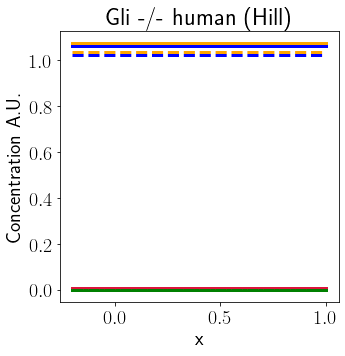

In [110]:
# Gli
X0 = [0.9978271229639294, 0.9976673744053118, 0.029296758259304223, 0.03117422425335577,0.9978271229639294, 0.9976673744053118, 0.029296758259304223, 0.03117422425335577]
peaks = [-0.27486732574316436, -0.2591047495617689, 0.6399389706904807, 0.18714034258181256, 0.7812142210598854, -1.7408165619204903, -0.34133876322069007, 0.11800724654229139, 1.327124483619135, 0.4906419235956352, -1.2142767941798462, -0.8888946937574329, 1.081736738931927, -1.1214705469400137, -1.2140511880713094, -2.1534471603227994, -1.1380675808521947]

# HUMAN
timepts=[0.5,1, 1.5, 2, 2.5, 3, 3.5, 4,5,6,7,8,9,10,11,12,13,14,16,18,20]
t_range=[0.5,20]
alpha_s=100
x = np.array([-0.2,-0.1,0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
Gs = np.exp(-x/0.15)

# ODEs

def ODEs(t, X, r_s, gamma_s, K_NI, K_OI, K_NP, K_OP, K_IO, K_NO, K_GO, K_IN, K_PN, K_ON, K_GN, psiI, psiP, psiO, psiN):

    phi_I = (1/((1+((10**K_OI)*X[6])**2)*(1+((10**K_NI)*X[7])**2))+ (10**psiI))
    phi_P = (1/((1+((10**K_OP)*X[6])**2)*(1+((10**K_NP)*X[7])**2))+ (10**psiP))
    phi_O = ((((10**0*0))**2)/((1+((10**K_IO)*X[4])**2)*(1+((10**K_NO)*X[7])**2)*(1+((10**0)*0)**2)) + (10**psiO))
    phi_N = ((((10**0*0))**2)/((1+((10**K_IN)*X[4])**2)*(1+((10**K_PN)*X[5])**2)*(1+((10**K_ON)*X[6])**2)*(1+((10**0)*0)**2)) + (10**psiN))

    dmI_dt = alpha_s*phi_I - alpha_s*X[0]
    dmP_dt = alpha_s*phi_P - alpha_s*X[1]
    dmO_dt = alpha_s*phi_O - alpha_s*X[2]
    dmN_dt = 0*phi_N - alpha_s*X[3]

    dI_dt = (10**r_s)*X[0] - (10**gamma_s)*X[4]
    dP_dt = (10**r_s)*X[1] - (10**gamma_s)*X[5]
    dO_dt = (10**r_s)*X[2] - (10**gamma_s)*X[6]
    dN_dt = (10**r_s)*X[3] - (10**gamma_s)*X[7]

    return np.array([dmI_dt, dmP_dt, dmO_dt, dmN_dt, dI_dt, dP_dt, dO_dt, dN_dt])


### plot ###

ss=[]
for n in Gs:
    G=n
    go = simulate_data(peaks)
    ss.append((go[-1]))
ss=np.array(ss)

## plot trajectories###
plt.rcParams["figure.figsize"] = (5,5)
_, ax = plt.subplots()
ax.plot(x, ss[:, 0], "-", color="orange", label="[mI]", linewidth=3.0)
ax.plot(x, ss[:, 1], "-", color="blue", label = "[mP]",linewidth=3.0)
ax.plot(x, ss[:, 2], "-", color="crimson", label = "[mO]",linewidth=3.0)
ax.plot(x, ss[:, 3], "-", color="green", label = "[mN]",linewidth=3.0)
ax.plot(x, ss[:, 4], "--", color="orange", label="[I]", linewidth=3.0)
ax.plot(x, ss[:, 5], "--", color="blue", label = "[P]",linewidth=3.0)
ax.plot(x, ss[:, 6], "--", color="crimson", label = "[O]",linewidth=3.0)
ax.plot(x, ss[:, 7], "--", color="green", label = "[N]",linewidth=3.0)


ax.set_xlabel("x")
ax.set_ylabel("Concentration A.U.")
ax.set_title('Gli -/- human (Hill)')
plt.savefig('mutants/Rayon_mutants/WT')
plt.show()

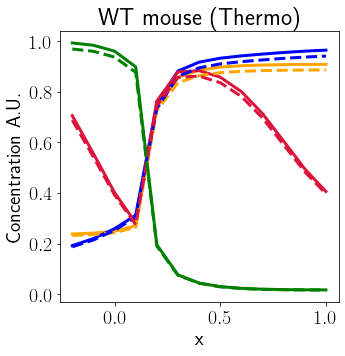

In [115]:
### THERMODYNAMIC
def ODEs(t, X, r_s, gamma_s, K_NI, K_OI, K_NP, K_OP, K_IO, K_NO, K_GO, K_IN, K_PN, K_ON, K_GN, K_LN, K_LP, K_LI, K_LO):
    
    # Ruben's Phi's
    phi_I = (((10**K_LI)*L)/(((10**K_LI)*L)+((1+(10**K_OI)*X[6])**2)*(1+(10**K_NI)*X[7])**2))
    phi_P = (((10**K_LP)*L)/(((10**K_LP)*L)+((1+(10**K_OP)*X[6])**2)*(1+(10**K_NP)*X[7])**2))
    phi_O = (((10**K_LO)*L*(1+c*(10**K_GO)*G))/(((10**K_LO)*L*(1+c*(10**K_GO)*G))+(1+(10**K_GO))*((1+(10**K_NO)*X[7])**2)*((1+(10**K_IO)*X[4])**2)))
    phi_N = (((10**K_LN)*L*(1+c*(10**K_GN)*G))/(((10**K_LN)*L*(1+c*(10**K_GN)*G))+(1+(10**K_GN))*((1+(10**K_ON)*X[6])**2)*((1+(10**K_IN)*X[4])**2)*((1+(10**K_PN)*X[5])**2)))
    
    dmI_dt = alpha_s*phi_I - alpha_s*X[0]
    dmP_dt = alpha_s*phi_P - alpha_s*X[1]
    dmO_dt = alpha_s*phi_O - alpha_s*X[2]
    dmN_dt = alpha_s*phi_N - alpha_s*X[3]
   
    dI_dt = (10**r_s)*X[0] - (10**gamma_s)*X[4]
    dP_dt = (10**r_s)*X[1] - (10**gamma_s)*X[5]
    dO_dt = (10**r_s)*X[2] - (10**gamma_s)*X[6]
    dN_dt = (10**r_s)*X[3] - (10**gamma_s)*X[7]
    
    return np.array([dmI_dt, dmP_dt, dmO_dt, dmN_dt, dI_dt, dP_dt, dO_dt, dN_dt])


peaks=[0.12354417584950964, 0.13421038475330838, 0.7222604343355739, -2.1092499591298344, 0.9949738184704241, -0.11279366120149437, -1.2262509921108453, 1.514129661948052, 1.8605636321891637, 0.735871150717416, 1.1372195018979534, -1.136717949934047, 0.3439976270839571, 2.678377329936782, 1.8919301458192994, 1.1687993903205869, 1.941917645557048]
X0 = [0.9673932616381912, 0.9905698391107712, 0.22032352020457502, 0.006276499439069383,0.9673932616381912, 0.9905698391107712, 0.22032352020457502, 0.006276499439069383]
# IPON

timepts=[0.5,1, 1.5, 2, 2.5, 3, 3.5, 4,5,6,7,8,9,10,11,12,13,14,16,18,20]
t_range=[0.5,20]
alpha_s=100
x = np.array([-0.2,-0.1,0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
Gs = np.exp(-x/0.15)

ss=[]
for n in Gs:
    G=n
    go = simulate_data(peaks)
    ss.append((go[-1]))
ss=np.array(ss)

### plot ###
plt.rcParams.update({'font.size': 20})


## plot trajectories###
plt.rcParams["figure.figsize"] = (5,5)
_, ax = plt.subplots()
ax.plot(x, ss[:, 0], "-", color="orange", label="[mI]", linewidth=3.0)
ax.plot(x, ss[:, 1], "-", color="blue", label = "[mP]",linewidth=3.0)
ax.plot(x, ss[:, 2], "-", color="crimson", label = "[mO]",linewidth=3.0)
ax.plot(x, ss[:, 3], "-", color="green", label = "[mN]",linewidth=3.0)
ax.plot(x, ss[:, 4], "--", color="orange", label="[I]", linewidth=3.0)
ax.plot(x, ss[:, 5], "--", color="blue", label = "[P]",linewidth=3.0)
ax.plot(x, ss[:, 6], "--", color="crimson", label = "[O]",linewidth=3.0)
ax.plot(x, ss[:, 7], "--", color="green", label = "[N]",linewidth=3.0)


ax.set_xlabel("x")
ax.set_ylabel("Concentration A.U.")
ax.set_title('WT mouse (Thermo)')
plt.savefig('mutants/Rayon_mutants/WT')
plt.show()




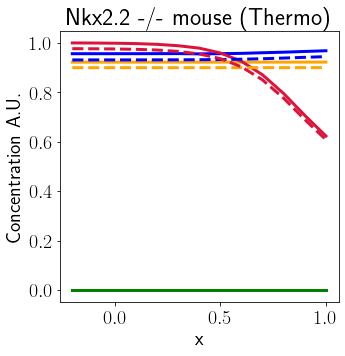

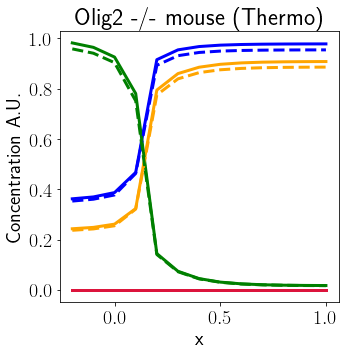

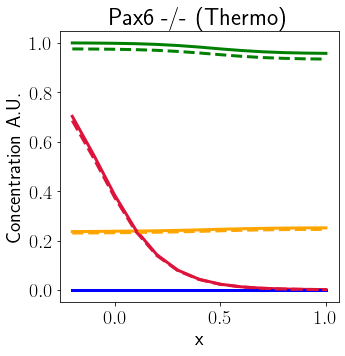

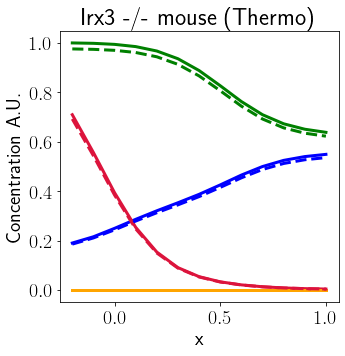

In [116]:
### MUTANTS ###

# X0 = {I, P, O, N}

# NKX2.2 #########################

X0 = [0.9673932616381912, 0.9905698391107712, 0.22032352020457502, 0,0.9673932616381912, 0.9905698391107712, 0.22032352020457502, 0]

def ODEs(t, X, r_s, gamma_s, K_NI, K_OI, K_NP, K_OP, K_IO, K_NO, K_GO, K_IN, K_PN, K_ON, K_GN, K_LN, K_LP, K_LI, K_LO):
    
    # Ruben's Phi's
    phi_I = (((10**K_LI)*L)/(((10**K_LI)*L)+((1+(10**K_OI)*X[6])**2)*(1+(10**K_NI)*X[7])**2))
    phi_P = (((10**K_LP)*L)/(((10**K_LP)*L)+((1+(10**K_OP)*X[6])**2)*(1+(10**K_NP)*X[7])**2))
    phi_O = (((10**K_LO)*L*(1+c*(10**K_GO)*G))/(((10**K_LO)*L*(1+c*(10**K_GO)*G))+(1+(10**K_GO))*((1+(10**K_NO)*X[7])**2)*((1+(10**K_IO)*X[4])**2)))
    phi_N = (((10**K_LN)*L*(1+c*(10**K_GN)*G))/(((10**K_LN)*L*(1+c*(10**K_GN)*G))+(1+(10**K_GN))*((1+(10**K_ON)*X[6])**2)*((1+(10**K_IN)*X[4])**2)*((1+(10**K_PN)*X[5])**2)))
    
    dmI_dt = alpha_s*phi_I - alpha_s*X[0]
    dmP_dt = alpha_s*phi_P - alpha_s*X[1]
    dmO_dt = alpha_s*phi_O - alpha_s*X[2]
    dmN_dt = 0*phi_N - alpha_s*X[3]
   
    dI_dt = (10**r_s)*X[0] - (10**gamma_s)*X[4]
    dP_dt = (10**r_s)*X[1] - (10**gamma_s)*X[5]
    dO_dt = (10**r_s)*X[2] - (10**gamma_s)*X[6]
    dN_dt = (10**r_s)*X[3] - (10**gamma_s)*X[7]
    
    return np.array([dmI_dt, dmP_dt, dmO_dt, dmN_dt, dI_dt, dP_dt, dO_dt, dN_dt])

ss=[]
for n in Gs:
    G=n
    go = simulate_data(peaks)
    ss.append((go[-1]))
ss=np.array(ss)

## plot trajectories###
plt.rcParams["figure.figsize"] = (5,5)
_, ax = plt.subplots()
ax.plot(x, ss[:, 0], "-", color="orange", label="[mI]", linewidth=3.0)
ax.plot(x, ss[:, 1], "-", color="blue", label = "[mP]",linewidth=3.0)
ax.plot(x, ss[:, 2], "-", color="crimson", label = "[mO]",linewidth=3.0)
ax.plot(x, ss[:, 3], "-", color="green", label = "[mN]",linewidth=3.0)
ax.plot(x, ss[:, 4], "--", color="orange", label="[I]", linewidth=3.0)
ax.plot(x, ss[:, 5], "--", color="blue", label = "[P]",linewidth=3.0)
ax.plot(x, ss[:, 6], "--", color="crimson", label = "[O]",linewidth=3.0)
ax.plot(x, ss[:, 7], "--", color="green", label = "[N]",linewidth=3.0)


ax.set_xlabel("x")
ax.set_ylabel("Concentration A.U.")
ax.set_title('Nkx2.2 -/- mouse (Thermo)')
# plt.savefig('mutants/Rayon_mutants/WT')
plt.show()

# OLIG2 ########################

X0 = [0.9673932616381912, 0.9905698391107712, 0, 0.006276499439069383,0.9673932616381912, 0.9905698391107712, 0, 0.006276499439069383]

def ODEs(t, X, r_s, gamma_s, K_NI, K_OI, K_NP, K_OP, K_IO, K_NO, K_GO, K_IN, K_PN, K_ON, K_GN, K_LN, K_LP, K_LI, K_LO):
    
    # Ruben's Phi's
    phi_I = (((10**K_LI)*L)/(((10**K_LI)*L)+((1+(10**K_OI)*X[6])**2)*(1+(10**K_NI)*X[7])**2))
    phi_P = (((10**K_LP)*L)/(((10**K_LP)*L)+((1+(10**K_OP)*X[6])**2)*(1+(10**K_NP)*X[7])**2))
    phi_O = (((10**K_LO)*L*(1+c*(10**K_GO)*G))/(((10**K_LO)*L*(1+c*(10**K_GO)*G))+(1+(10**K_GO))*((1+(10**K_NO)*X[7])**2)*((1+(10**K_IO)*X[4])**2)))
    phi_N = (((10**K_LN)*L*(1+c*(10**K_GN)*G))/(((10**K_LN)*L*(1+c*(10**K_GN)*G))+(1+(10**K_GN))*((1+(10**K_ON)*X[6])**2)*((1+(10**K_IN)*X[4])**2)*((1+(10**K_PN)*X[5])**2)))
    
    dmI_dt = alpha_s*phi_I - alpha_s*X[0]
    dmP_dt = alpha_s*phi_P - alpha_s*X[1]
    dmO_dt = 0*phi_O - alpha_s*X[2]
    dmN_dt = alpha_s*phi_N - alpha_s*X[3]
   
    dI_dt = (10**r_s)*X[0] - (10**gamma_s)*X[4]
    dP_dt = (10**r_s)*X[1] - (10**gamma_s)*X[5]
    dO_dt = (10**r_s)*X[2] - (10**gamma_s)*X[6]
    dN_dt = (10**r_s)*X[3] - (10**gamma_s)*X[7]
    
    return np.array([dmI_dt, dmP_dt, dmO_dt, dmN_dt, dI_dt, dP_dt, dO_dt, dN_dt])

ss=[]
for n in Gs:
    G=n
    go = simulate_data(peaks)
    ss.append((go[-1]))
ss=np.array(ss)

## plot trajectories###
plt.rcParams["figure.figsize"] = (5,5)
_, ax = plt.subplots()
ax.plot(x, ss[:, 0], "-", color="orange", label="[mI]", linewidth=3.0)
ax.plot(x, ss[:, 1], "-", color="blue", label = "[mP]",linewidth=3.0)
ax.plot(x, ss[:, 2], "-", color="crimson", label = "[mO]",linewidth=3.0)
ax.plot(x, ss[:, 3], "-", color="green", label = "[mN]",linewidth=3.0)
ax.plot(x, ss[:, 4], "--", color="orange", label="[I]", linewidth=3.0)
ax.plot(x, ss[:, 5], "--", color="blue", label = "[P]",linewidth=3.0)
ax.plot(x, ss[:, 6], "--", color="crimson", label = "[O]",linewidth=3.0)
ax.plot(x, ss[:, 7], "--", color="green", label = "[N]",linewidth=3.0)


ax.set_xlabel("x")
ax.set_ylabel("Concentration A.U.")
ax.set_title('Olig2 -/- mouse (Thermo)')
# plt.savefig('mutants/Rayon_mutants/WT')
plt.show()

# Pax6 ###############################

X0 = [0.9673932616381912, 0, 0.22032352020457502, 0.006276499439069383,0.9673932616381912, 0, 0.22032352020457502, 0.006276499439069383]

def ODEs(t, X, r_s, gamma_s, K_NI, K_OI, K_NP, K_OP, K_IO, K_NO, K_GO, K_IN, K_PN, K_ON, K_GN, K_LN, K_LP, K_LI, K_LO):
    
    # Ruben's Phi's
    phi_I = (((10**K_LI)*L)/(((10**K_LI)*L)+((1+(10**K_OI)*X[6])**2)*(1+(10**K_NI)*X[7])**2))
    phi_P = (((10**K_LP)*L)/(((10**K_LP)*L)+((1+(10**K_OP)*X[6])**2)*(1+(10**K_NP)*X[7])**2))
    phi_O = (((10**K_LO)*L*(1+c*(10**K_GO)*G))/(((10**K_LO)*L*(1+c*(10**K_GO)*G))+(1+(10**K_GO))*((1+(10**K_NO)*X[7])**2)*((1+(10**K_IO)*X[4])**2)))
    phi_N = (((10**K_LN)*L*(1+c*(10**K_GN)*G))/(((10**K_LN)*L*(1+c*(10**K_GN)*G))+(1+(10**K_GN))*((1+(10**K_ON)*X[6])**2)*((1+(10**K_IN)*X[4])**2)*((1+(10**K_PN)*X[5])**2)))
    
    dmI_dt = alpha_s*phi_I - alpha_s*X[0]
    dmP_dt = 0*phi_P - alpha_s*X[1]
    dmO_dt = alpha_s*phi_O - alpha_s*X[2]
    dmN_dt = alpha_s*phi_N - alpha_s*X[3]
   
    dI_dt = (10**r_s)*X[0] - (10**gamma_s)*X[4]
    dP_dt = (10**r_s)*X[1] - (10**gamma_s)*X[5]
    dO_dt = (10**r_s)*X[2] - (10**gamma_s)*X[6]
    dN_dt = (10**r_s)*X[3] - (10**gamma_s)*X[7]
    
    return np.array([dmI_dt, dmP_dt, dmO_dt, dmN_dt, dI_dt, dP_dt, dO_dt, dN_dt])

ss=[]
for n in Gs:
    G=n
    go = simulate_data(peaks)
    ss.append((go[-1]))
ss=np.array(ss)

## plot trajectories###
plt.rcParams["figure.figsize"] = (5,5)
_, ax = plt.subplots()
ax.plot(x, ss[:, 0], "-", color="orange", label="[mI]", linewidth=3.0)
ax.plot(x, ss[:, 1], "-", color="blue", label = "[mP]",linewidth=3.0)
ax.plot(x, ss[:, 2], "-", color="crimson", label = "[mO]",linewidth=3.0)
ax.plot(x, ss[:, 3], "-", color="green", label = "[mN]",linewidth=3.0)
ax.plot(x, ss[:, 4], "--", color="orange", label="[I]", linewidth=3.0)
ax.plot(x, ss[:, 5], "--", color="blue", label = "[P]",linewidth=3.0)
ax.plot(x, ss[:, 6], "--", color="crimson", label = "[O]",linewidth=3.0)
ax.plot(x, ss[:, 7], "--", color="green", label = "[N]",linewidth=3.0)


ax.set_xlabel("x")
ax.set_ylabel("Concentration A.U.")
ax.set_title('Pax6 -/- (Thermo)')
# plt.savefig('mutants/Rayon_mutants/WT')
plt.show()

# Irx3 ###############################

X0 = [0, 0.9905698391107712, 0.22032352020457502, 0.006276499439069383,0, 0.9905698391107712, 0.22032352020457502, 0.006276499439069383]

def ODEs(t, X, r_s, gamma_s, K_NI, K_OI, K_NP, K_OP, K_IO, K_NO, K_GO, K_IN, K_PN, K_ON, K_GN, K_LN, K_LP, K_LI, K_LO):
    
    # Ruben's Phi's
    phi_I = (((10**K_LI)*L)/(((10**K_LI)*L)+((1+(10**K_OI)*X[6])**2)*(1+(10**K_NI)*X[7])**2))
    phi_P = (((10**K_LP)*L)/(((10**K_LP)*L)+((1+(10**K_OP)*X[6])**2)*(1+(10**K_NP)*X[7])**2))
    phi_O = (((10**K_LO)*L*(1+c*(10**K_GO)*G))/(((10**K_LO)*L*(1+c*(10**K_GO)*G))+(1+(10**K_GO))*((1+(10**K_NO)*X[7])**2)*((1+(10**K_IO)*X[4])**2)))
    phi_N = (((10**K_LN)*L*(1+c*(10**K_GN)*G))/(((10**K_LN)*L*(1+c*(10**K_GN)*G))+(1+(10**K_GN))*((1+(10**K_ON)*X[6])**2)*((1+(10**K_IN)*X[4])**2)*((1+(10**K_PN)*X[5])**2)))
    
    dmI_dt = 0*phi_I - alpha_s*X[0]
    dmP_dt = alpha_s*phi_P - alpha_s*X[1]
    dmO_dt = alpha_s*phi_O - alpha_s*X[2]
    dmN_dt = alpha_s*phi_N - alpha_s*X[3]
   
    dI_dt = (10**r_s)*X[0] - (10**gamma_s)*X[4]
    dP_dt = (10**r_s)*X[1] - (10**gamma_s)*X[5]
    dO_dt = (10**r_s)*X[2] - (10**gamma_s)*X[6]
    dN_dt = (10**r_s)*X[3] - (10**gamma_s)*X[7]
    
    return np.array([dmI_dt, dmP_dt, dmO_dt, dmN_dt, dI_dt, dP_dt, dO_dt, dN_dt])

ss=[]
for n in Gs:
    G=n
    go = simulate_data(peaks)
    ss.append((go[-1]))
ss=np.array(ss)

## plot trajectories###
plt.rcParams["figure.figsize"] = (5,5)
_, ax = plt.subplots()
ax.plot(x, ss[:, 0], "-", color="orange", label="[mI]", linewidth=3.0)
ax.plot(x, ss[:, 1], "-", color="blue", label = "[mP]",linewidth=3.0)
ax.plot(x, ss[:, 2], "-", color="crimson", label = "[mO]",linewidth=3.0)
ax.plot(x, ss[:, 3], "-", color="green", label = "[mN]",linewidth=3.0)
ax.plot(x, ss[:, 4], "--", color="orange", label="[I]", linewidth=3.0)
ax.plot(x, ss[:, 5], "--", color="blue", label = "[P]",linewidth=3.0)
ax.plot(x, ss[:, 6], "--", color="crimson", label = "[O]",linewidth=3.0)
ax.plot(x, ss[:, 7], "--", color="green", label = "[N]",linewidth=3.0)


ax.set_xlabel("x")
ax.set_ylabel("Concentration A.U.")
ax.set_title('Irx3 -/- mouse (Thermo)')
# plt.savefig('mutants/Rayon_mutants/WT')
plt.show()

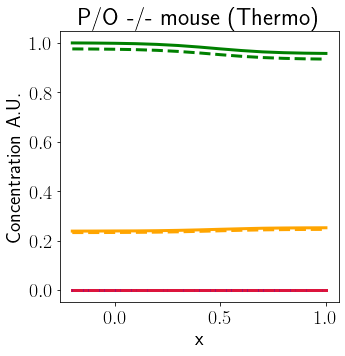

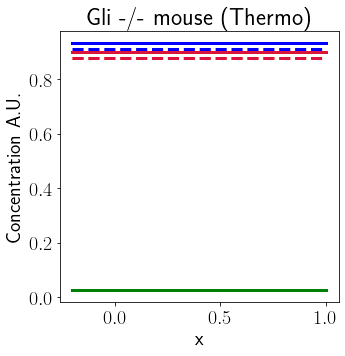

In [119]:
# Pax6/olig2 ###############################

X0 = [0.9673932616381912, 0, 0, 0.006276499439069383,0.9673932616381912, 0, 0, 0.006276499439069383]

def ODEs(t, X, r_s, gamma_s, K_NI, K_OI, K_NP, K_OP, K_IO, K_NO, K_GO, K_IN, K_PN, K_ON, K_GN, K_LN, K_LP, K_LI, K_LO):
    
    # Ruben's Phi's
    phi_I = (((10**K_LI)*L)/(((10**K_LI)*L)+((1+(10**K_OI)*X[6])**2)*(1+(10**K_NI)*X[7])**2))
    phi_P = (((10**K_LP)*L)/(((10**K_LP)*L)+((1+(10**K_OP)*X[6])**2)*(1+(10**K_NP)*X[7])**2))
    phi_O = (((10**K_LO)*L*(1+c*(10**K_GO)*G))/(((10**K_LO)*L*(1+c*(10**K_GO)*G))+(1+(10**K_GO))*((1+(10**K_NO)*X[7])**2)*((1+(10**K_IO)*X[4])**2)))
    phi_N = (((10**K_LN)*L*(1+c*(10**K_GN)*G))/(((10**K_LN)*L*(1+c*(10**K_GN)*G))+(1+(10**K_GN))*((1+(10**K_ON)*X[6])**2)*((1+(10**K_IN)*X[4])**2)*((1+(10**K_PN)*X[5])**2)))
    
    dmI_dt = alpha_s*phi_I - alpha_s*X[0]
    dmP_dt = 0*phi_P - alpha_s*X[1]
    dmO_dt = 0*phi_O - alpha_s*X[2]
    dmN_dt = alpha_s*phi_N - alpha_s*X[3]
   
    dI_dt = (10**r_s)*X[0] - (10**gamma_s)*X[4]
    dP_dt = (10**r_s)*X[1] - (10**gamma_s)*X[5]
    dO_dt = (10**r_s)*X[2] - (10**gamma_s)*X[6]
    dN_dt = (10**r_s)*X[3] - (10**gamma_s)*X[7]
    
    return np.array([dmI_dt, dmP_dt, dmO_dt, dmN_dt, dI_dt, dP_dt, dO_dt, dN_dt])

ss=[]
for n in Gs:
    G=n
    go = simulate_data(peaks)
    ss.append((go[-1]))
ss=np.array(ss)

## plot trajectories###
plt.rcParams["figure.figsize"] = (5,5)
_, ax = plt.subplots()
ax.plot(x, ss[:, 0], "-", color="orange", label="[mI]", linewidth=3.0)
ax.plot(x, ss[:, 1], "-", color="blue", label = "[mP]",linewidth=3.0)
ax.plot(x, ss[:, 2], "-", color="crimson", label = "[mO]",linewidth=3.0)
ax.plot(x, ss[:, 3], "-", color="green", label = "[mN]",linewidth=3.0)
ax.plot(x, ss[:, 4], "--", color="orange", label="[I]", linewidth=3.0)
ax.plot(x, ss[:, 5], "--", color="blue", label = "[P]",linewidth=3.0)
ax.plot(x, ss[:, 6], "--", color="crimson", label = "[O]",linewidth=3.0)
ax.plot(x, ss[:, 7], "--", color="green", label = "[N]",linewidth=3.0)


ax.set_xlabel("x")
ax.set_ylabel("Concentration A.U.")
ax.set_title('P/O -/- mouse (Thermo)')
# plt.savefig('mutants/Rayon_mutants/WT')
plt.show()

# Gli -/- ###############################

X0 = [0.9673932616381912, 0.9905698391107712, 0.22032352020457502, 0.006276499439069383,0.9673932616381912, 0.9905698391107712, 0.22032352020457502, 0.006276499439069383]

def ODEs(t, X, r_s, gamma_s, K_NI, K_OI, K_NP, K_OP, K_IO, K_NO, K_GO, K_IN, K_PN, K_ON, K_GN, K_LN, K_LP, K_LI, K_LO):
    
    # Ruben's Phi's
    phi_I = (((10**K_LI)*L)/(((10**K_LI)*L)+((1+(10**K_OI)*X[6])**2)*(1+(10**K_NI)*X[7])**2))
    phi_P = (((10**K_LP)*L)/(((10**K_LP)*L)+((1+(10**K_OP)*X[6])**2)*(1+(10**K_NP)*X[7])**2))
    phi_O = (((10**K_LO)*L*(1+c*(10**0)*0))/(((10**K_LO)*L*(1+c*(10**0)*0))+(1+(10**0))*((1+(10**K_NO)*X[7])**2)*((1+(10**K_IO)*X[4])**2)))
    phi_N = (((10**K_LN)*L*(1+c*(10**0)*0))/(((10**K_LN)*L*(1+c*(10**0)*0))+(1+(10**0))*((1+(10**K_ON)*X[6])**2)*((1+(10**K_IN)*X[4])**2)*((1+(10**K_PN)*X[5])**2)))
    
    dmI_dt = alpha_s*phi_I - alpha_s*X[0]
    dmP_dt = alpha_s*phi_P - alpha_s*X[1]
    dmO_dt = alpha_s*phi_O - alpha_s*X[2]
    dmN_dt = alpha_s*phi_N - alpha_s*X[3]
   
    dI_dt = (10**r_s)*X[0] - (10**gamma_s)*X[4]
    dP_dt = (10**r_s)*X[1] - (10**gamma_s)*X[5]
    dO_dt = (10**r_s)*X[2] - (10**gamma_s)*X[6]
    dN_dt = (10**r_s)*X[3] - (10**gamma_s)*X[7]
    
    return np.array([dmI_dt, dmP_dt, dmO_dt, dmN_dt, dI_dt, dP_dt, dO_dt, dN_dt])

ss=[]
for n in Gs:
    G=n
    go = simulate_data(peaks)
    ss.append((go[-1]))
ss=np.array(ss)

## plot trajectories###
plt.rcParams["figure.figsize"] = (5,5)
_, ax = plt.subplots()
ax.plot(x, ss[:, 0], "-", color="orange", label="[mI]", linewidth=3.0)
ax.plot(x, ss[:, 1], "-", color="blue", label = "[mP]",linewidth=3.0)
ax.plot(x, ss[:, 2], "-", color="crimson", label = "[mO]",linewidth=3.0)
ax.plot(x, ss[:, 3], "-", color="green", label = "[mN]",linewidth=3.0)
ax.plot(x, ss[:, 4], "--", color="orange", label="[I]", linewidth=3.0)
ax.plot(x, ss[:, 5], "--", color="blue", label = "[P]",linewidth=3.0)
ax.plot(x, ss[:, 6], "--", color="crimson", label = "[O]",linewidth=3.0)
ax.plot(x, ss[:, 7], "--", color="green", label = "[N]",linewidth=3.0)


ax.set_xlabel("x")
ax.set_ylabel("Concentration A.U.")
ax.set_title('Gli -/- mouse (Thermo)')
# plt.savefig('mutants/Rayon_mutants/WT')
plt.show()